# Projet de Machine Learning

Notebook R avec les codes utilisés pour le rapport final.

## Importation des librairies

In [1]:
library(vcd)
library(ggplot2)

Warning message:
"package 'vcd' was built under R version 4.0.5"
Loading required package: grid



# Obtenir les données

In [2]:
spotify_data <- read.table(file = "data/spotify-extr.txt", header = T, sep = " ")

# Description de l'ensemble du jeu de données

In [3]:
head(spotify_data)

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
161704,0.647,1975,0.4490,0.376,298840,0.827,7.88e-03,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,1.12e-05,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,8.39e-02,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,5.52e-01,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,7.73e-06,G,0.348,-11.963,0,38,0.0639,97.831,C
38184,0.489,2018,0.3710,0.856,324189,0.694,0.00e+00,D,0.109,-4.393,1,68,0.1690,122.080,A


In [4]:
dim(spotify_data)

[1] 10000    15

In [5]:
sapply(spotify_data, class)

valence             year     acousticness     danceability 
       "numeric"        "integer"        "numeric"        "numeric" 
        duration           energy instrumentalness              key 
       "integer"        "numeric"        "numeric"      "character" 
        liveness         loudness             mode       popularity 
       "numeric"        "numeric"        "integer"        "integer" 
     speechiness            tempo        pop.class 
       "numeric"        "numeric"      "character"

In [6]:
sum(is.na(spotify_data))

[1] 0

In [7]:
spotify_data$pop.class <- factor(spotify_data$pop.class, order = T)
spotify_data$key <- factor(spotify_data$key)
spotify_data$mode <- factor(spotify_data$mode)

In [8]:
levels(spotify_data$pop.class)
levels(spotify_data$key)
levels(spotify_data$mode)

[1] "A" "B" "C" "D"

[1] "A"  "Ab" "B"  "Bb" "C"  "D"  "Db" "E"  "Eb" "F"  "G"  "Gb"

[1] "0" "1"

In [9]:
pop.class <- spotify_data$pop.class
key <- spotify_data$key
popularity <- spotify_data$popularity

In [10]:
percentage <- prop.table(table(pop.class)) * 100
freqs <- cbind(freq = table(pop.class), percentage = percentage)
freqs

,freq,percentage
A,963,9.63
B,2886,28.86
C,2968,29.68
D,3183,31.83


In [11]:
percentage <- prop.table(table(key)) * 100
freqs <- cbind(freq = table(key), percentage = percentage)
freqs

,freq,percentage
A,1050,10.50
Ab,637,6.37
B,603,6.03
Bb,746,7.46
C,1282,12.82
D,1092,10.92
Db,769,7.69
E,743,7.43
Eb,435,4.35
F,961,9.61


In [12]:
summary(spotify_data)

    valence            year       acousticness      danceability  
 Min.   :0.0000   Min.   :1921   Min.   :0.00000   Min.   :0.000  
 1st Qu.:0.3240   1st Qu.:1956   1st Qu.:0.09267   1st Qu.:0.417  
 Median :0.5430   Median :1978   Median :0.50400   Median :0.550  
 Mean   :0.5328   Mean   :1977   Mean   :0.49572   Mean   :0.540  
 3rd Qu.:0.7510   3rd Qu.:1999   3rd Qu.:0.88925   3rd Qu.:0.671  
 Max.   :0.9930   Max.   :2020   Max.   :0.99600   Max.   :0.988  
                                                                  
    duration           energy       instrumentalness        key      
 Min.   :   5991   Min.   :0.0000   Min.   :0.000000   C      :1282  
 1st Qu.: 169067   1st Qu.:0.2620   1st Qu.:0.000000   G      :1188  
 Median : 206530   Median :0.4760   Median :0.000174   D      :1092  
 Mean   : 227215   Mean   :0.4875   Mean   :0.164947   A      :1050  
 3rd Qu.: 259733   3rd Qu.:0.7080   3rd Qu.:0.087100   F      : 961  
 Max.   :2703227   Max.   :1.0000   Max.   :

# Analyses uni et multidimensionnelles

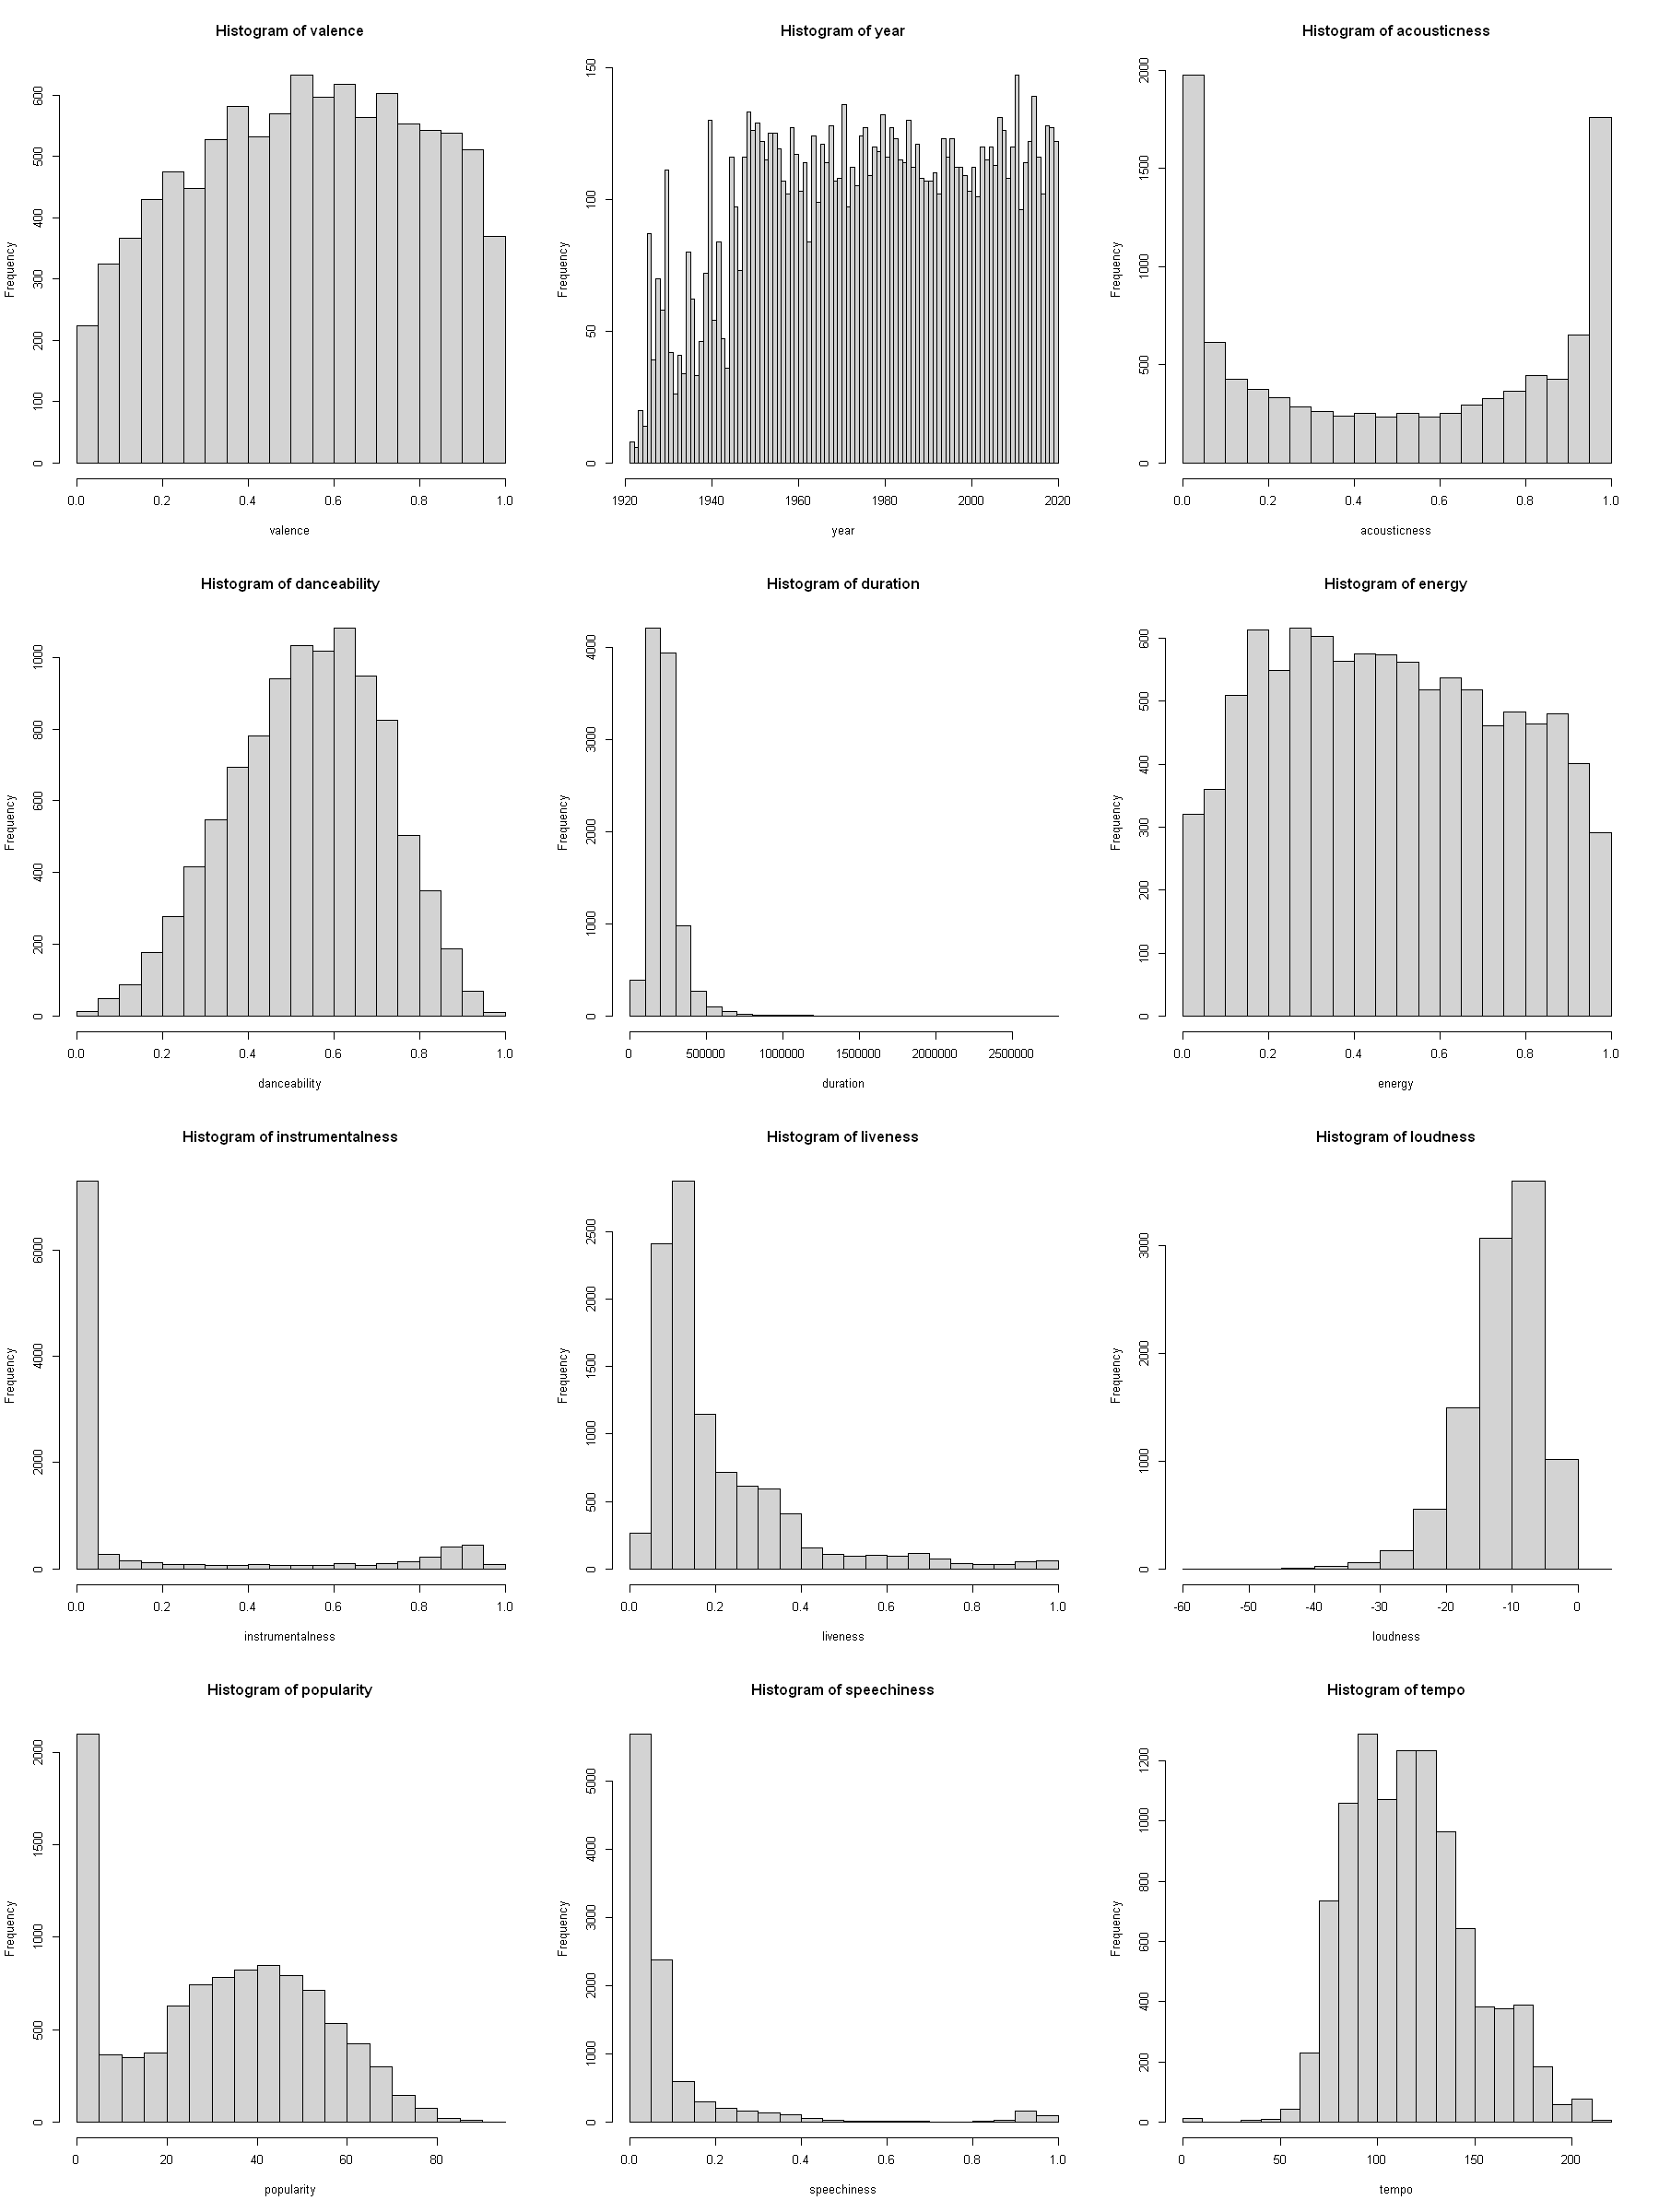

In [13]:
library(vcd)

data_quant <- spotify_data[, -c(8, 11, 15)]

options(repr.plot.width = 15, repr.plot.height = 20)
par(mfrow = c(4, 3))
for (i in 1:12) {
    hist(data_quant[, i], main = paste("Histogram of", colnames(data_quant)[i], sep = " "), 
        breaks = ifelse(i == 2, 100, 20), xlab = colnames(data_quant)[i])
}

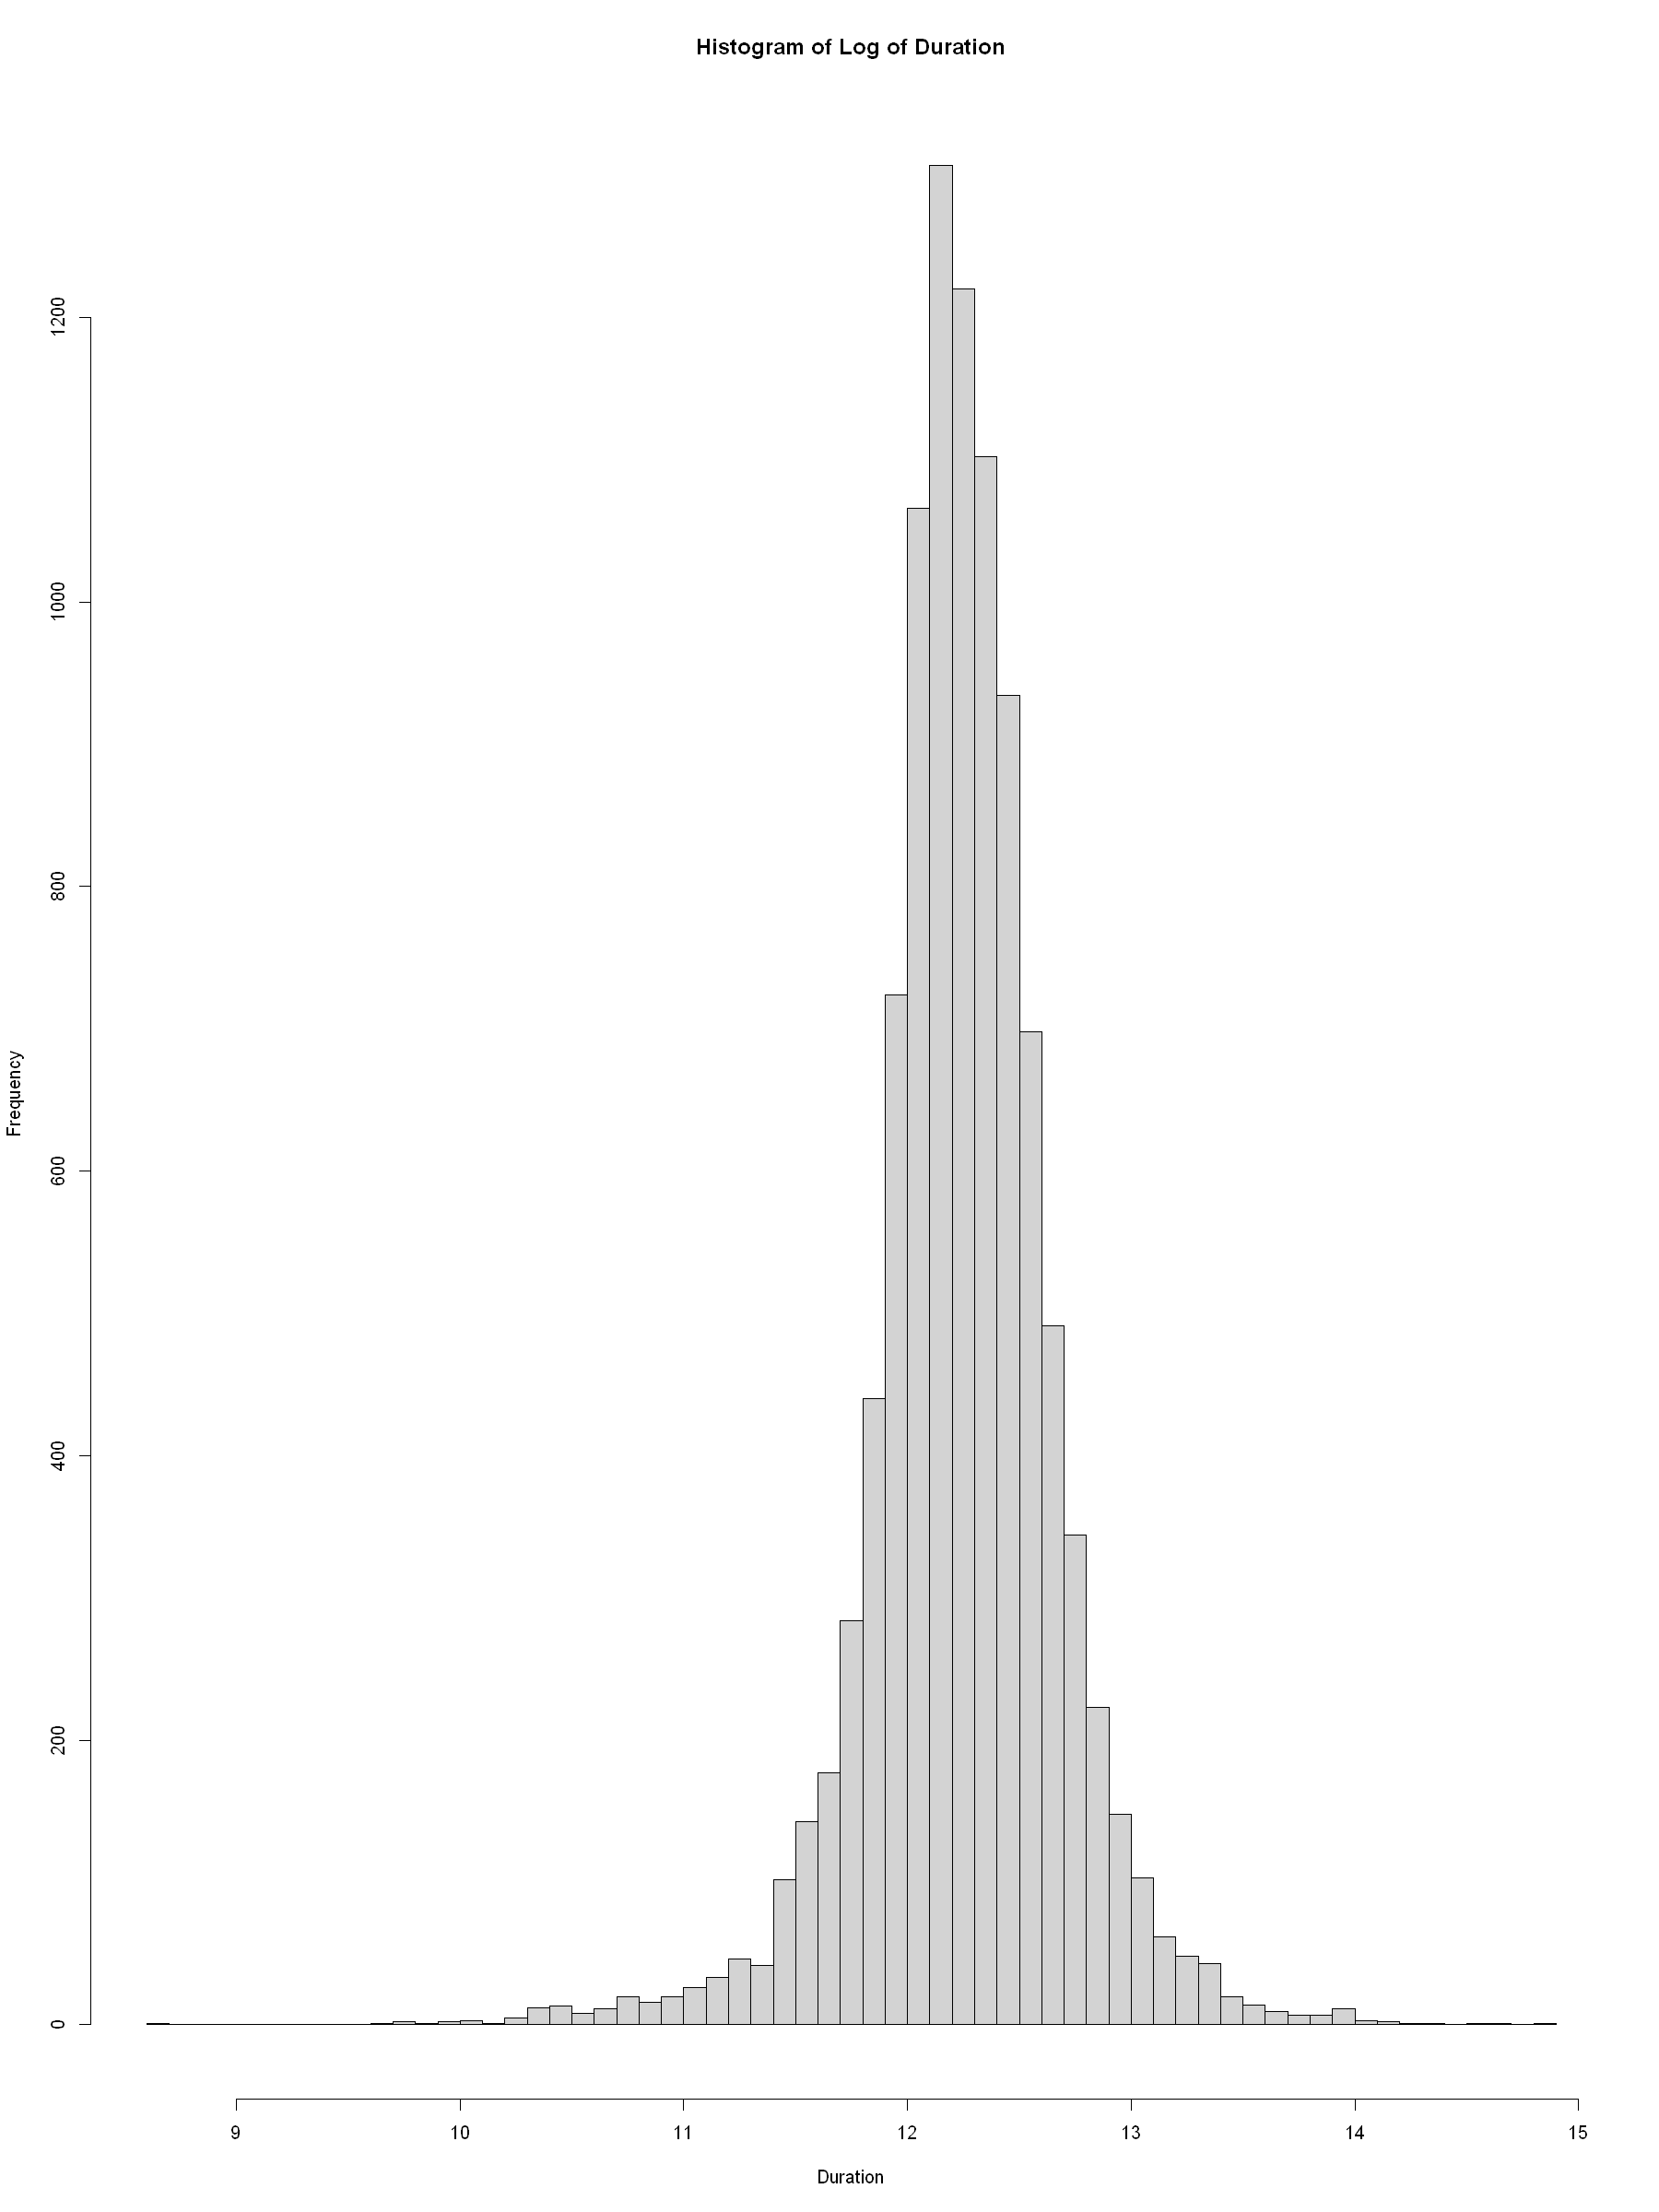

In [14]:
spotify_data$log_duration <- log(spotify_data$duration)
hist(spotify_data$log_duration, main = "Histogram of Log of Duration", breaks = 50, 
    xlab = "Duration")

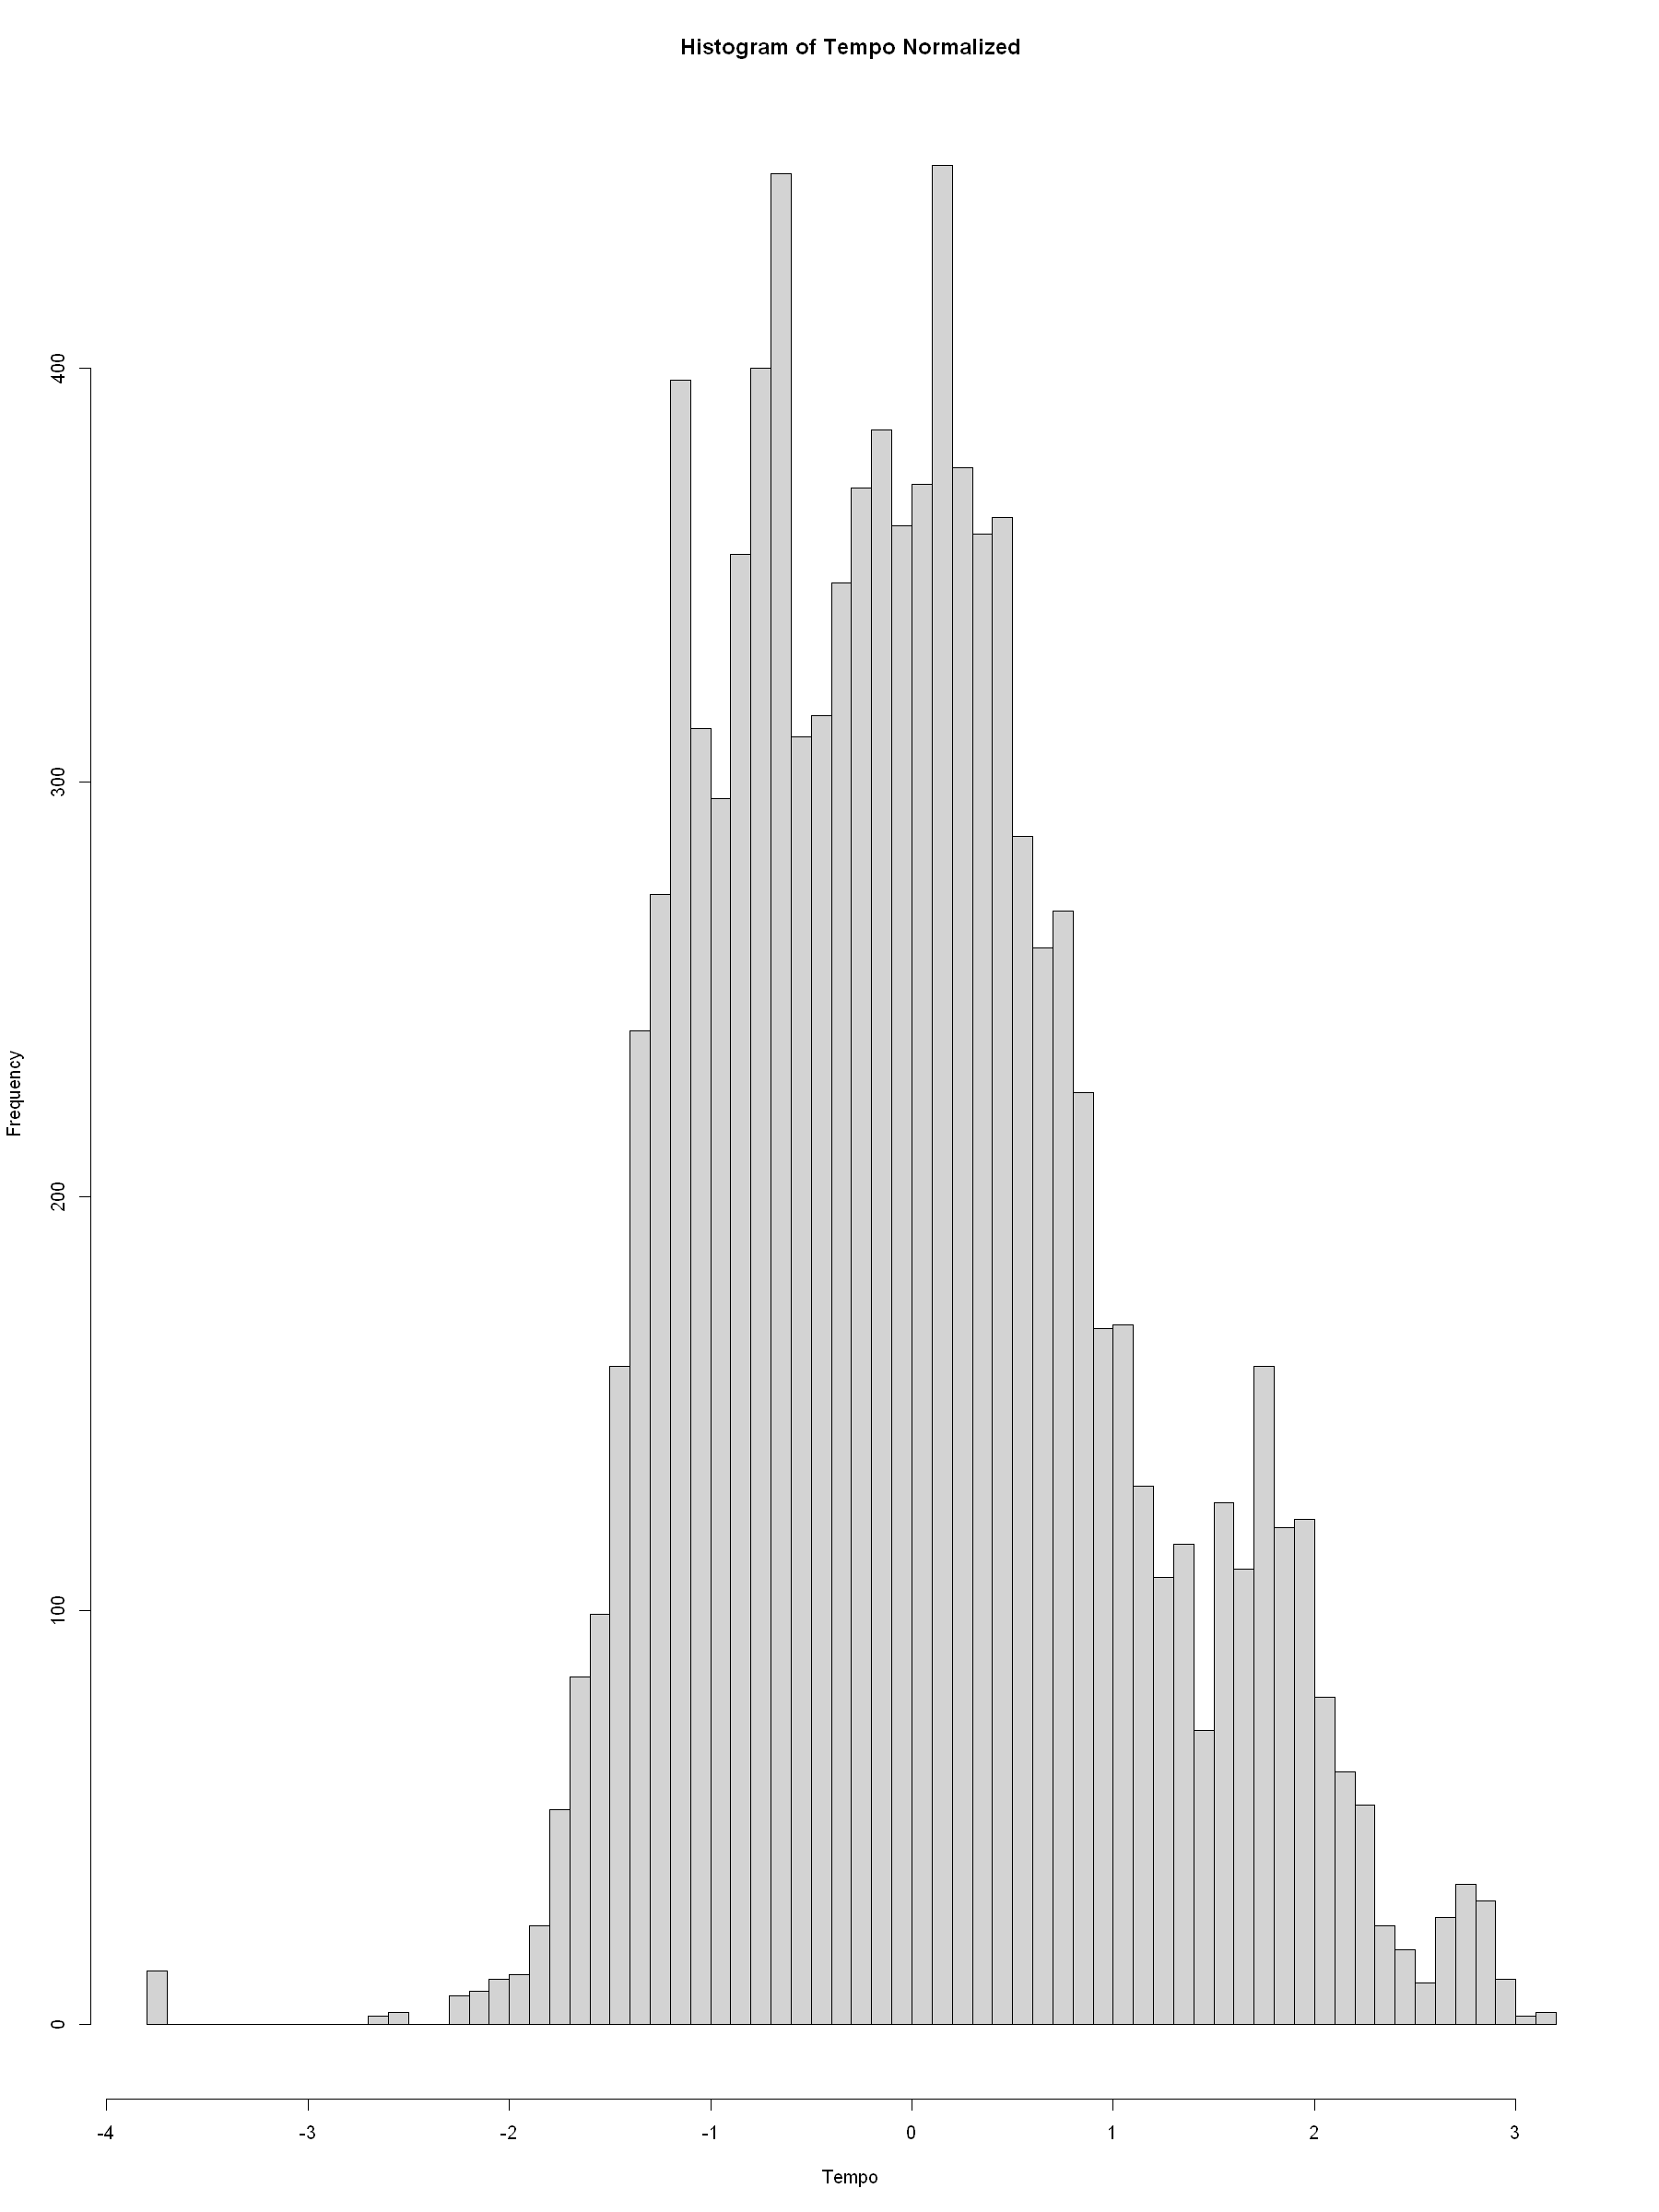

In [15]:
spotify_data$tempo_norm <- scale(spotify_data$tempo)
hist(spotify_data$tempo_norm, main = "Histogram of Tempo Normalized", breaks = 50, 
    xlab = "Tempo")

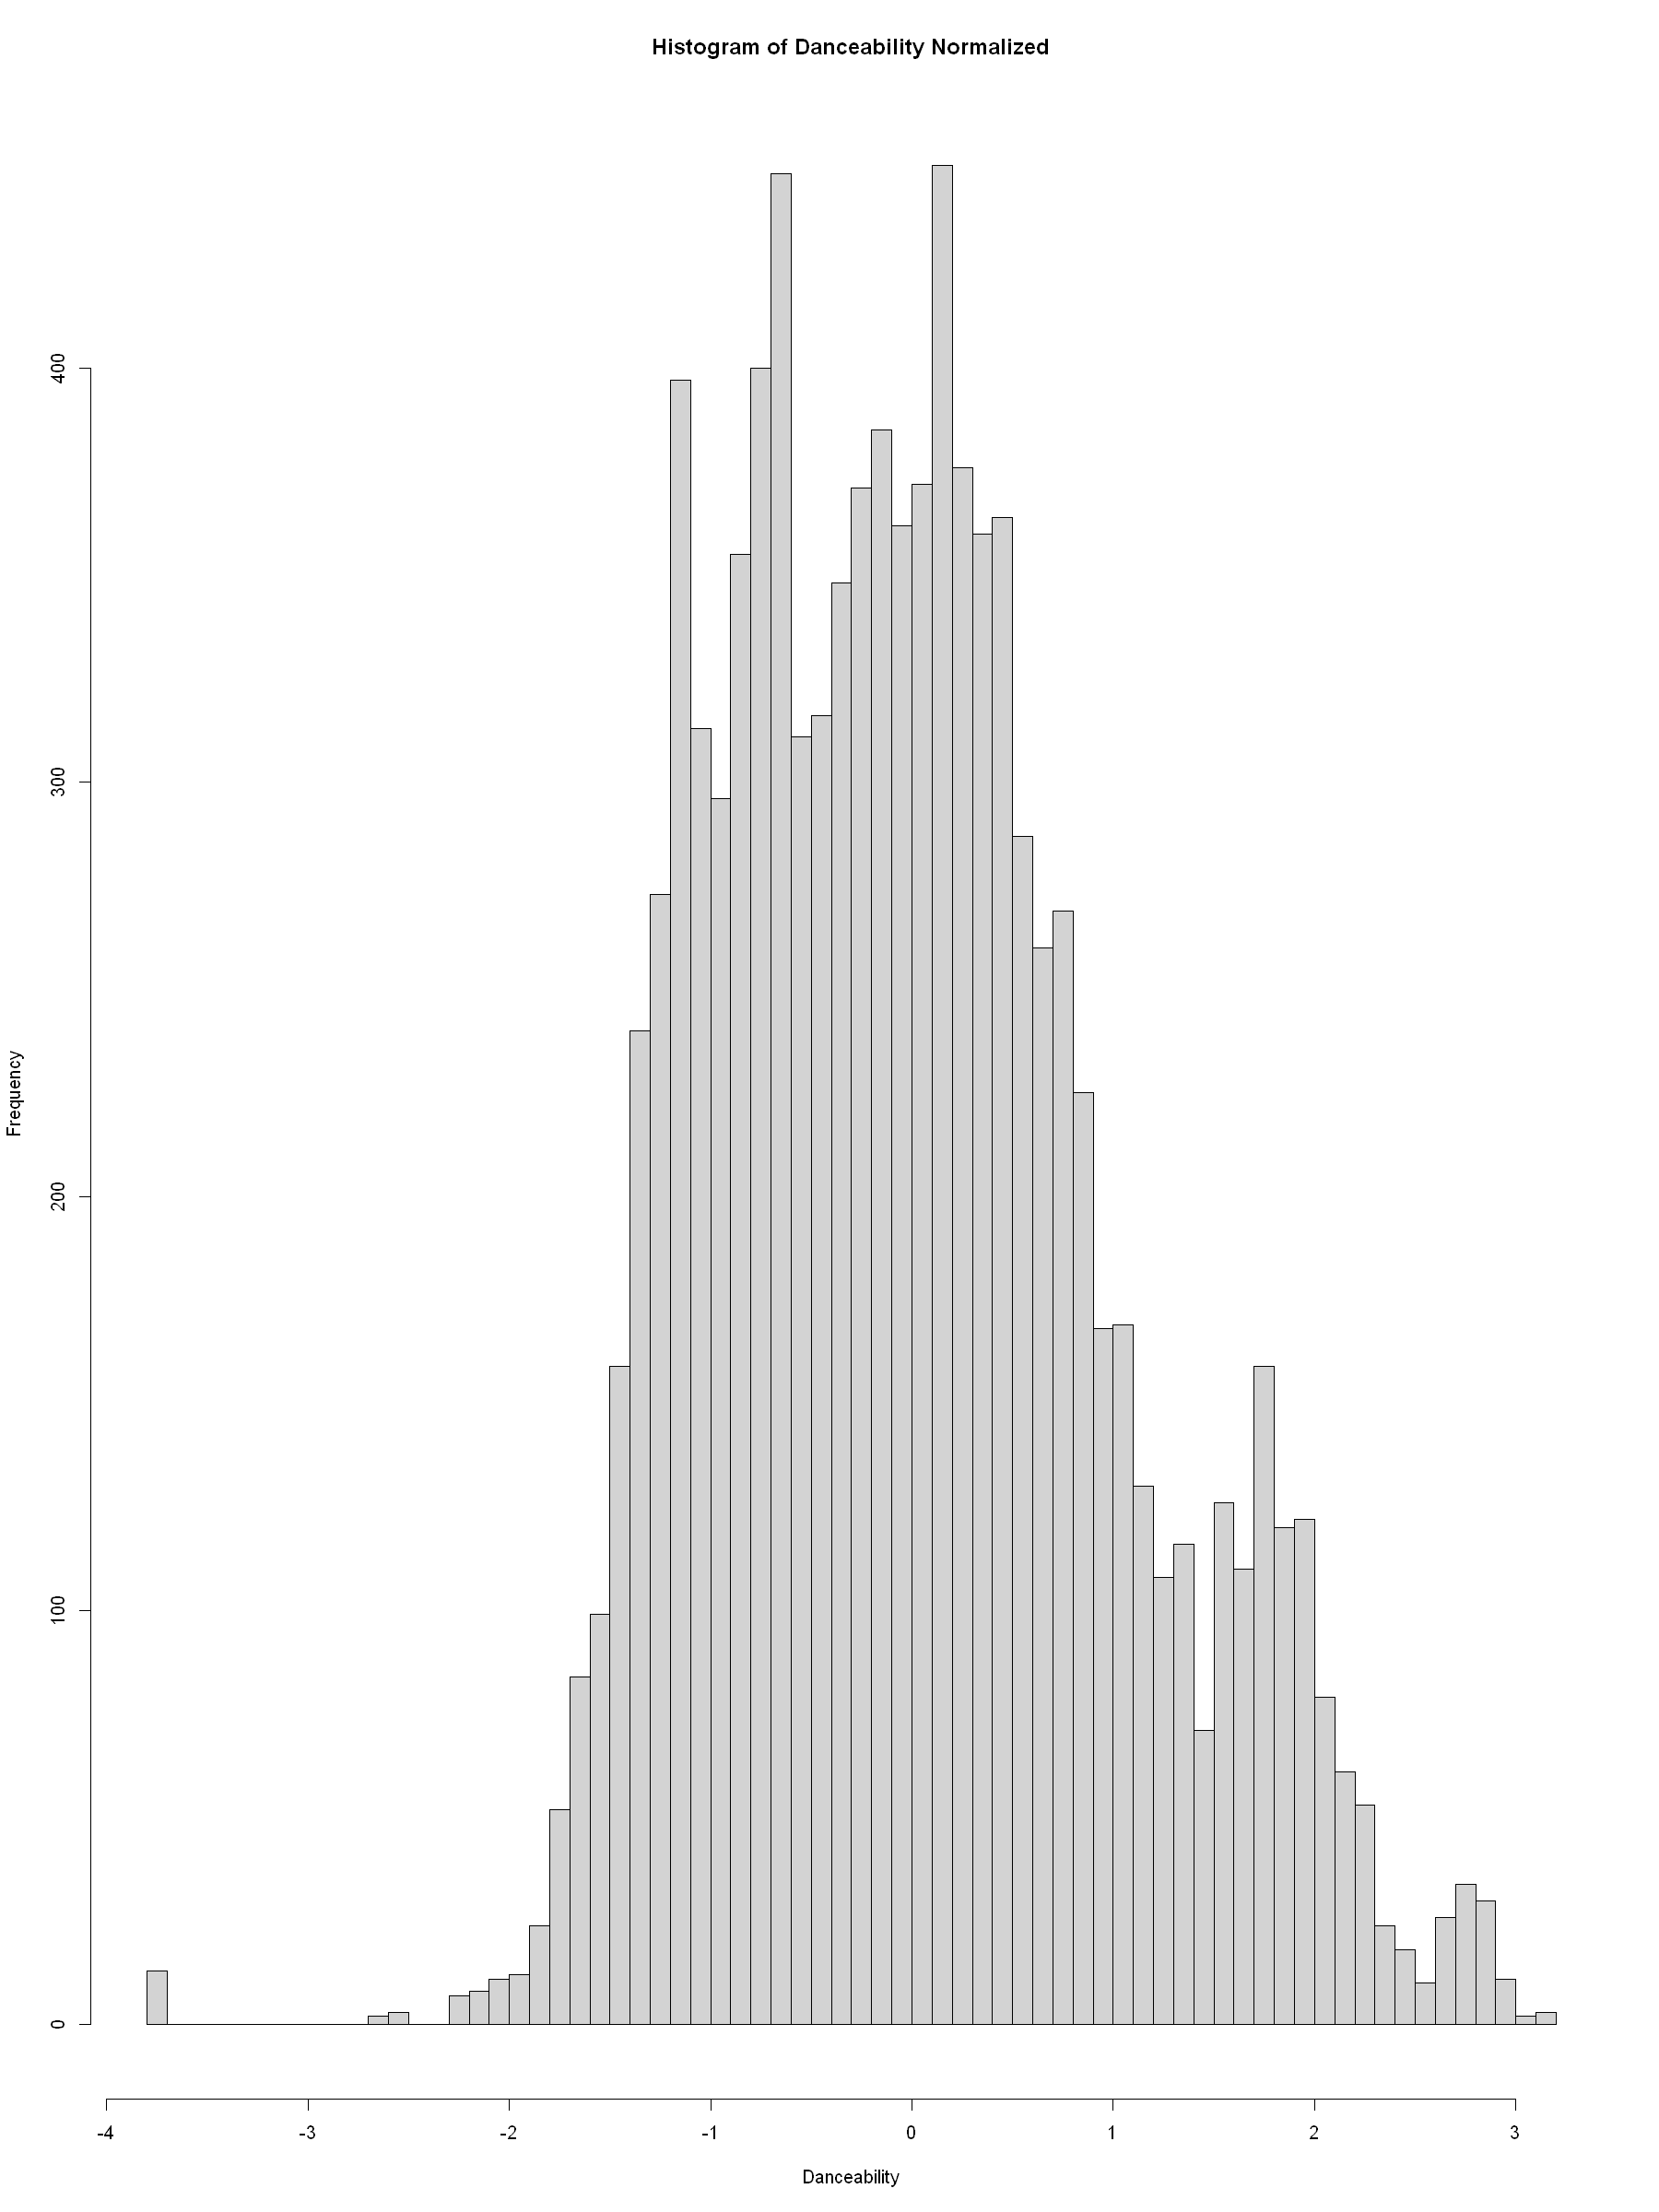

In [16]:
spotify_data$dance_norm <- scale(spotify_data$danceability)
hist(spotify_data$tempo_norm, main = "Histogram of Danceability Normalized", breaks = 50, 
    xlab = "Danceability")

In [17]:
spotify_data <- spotify_data[, -c(4, 5, 14)]
head(spotify_data)

,valence,year,acousticness,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,pop.class,log_duration,tempo_norm,dance_norm
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<ord>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
161704,0.647,1975,0.4490,0.827,7.88e-03,B,0.466,-7.604,1,25,0.3990,C,12.60766,1.7310595,-0.9309645
168077,0.150,2008,0.8990,0.169,1.12e-05,Ab,0.136,-11.332,1,42,0.0553,B,12.37497,-0.3031657,-0.1817845
35922,0.423,2007,0.0185,0.878,8.39e-02,B,0.276,-5.576,0,65,0.0377,A,12.61517,1.0729184,-0.3974575
135823,0.302,1995,0.0384,0.980,5.52e-01,B,0.237,-3.154,1,36,0.0721,C,11.86499,1.7985786,-2.0660858
165395,0.828,1994,0.5310,0.625,7.73e-06,G,0.348,-11.963,0,38,0.0639,C,12.14313,-0.6146381,0.9363100
38184,0.489,2018,0.3710,0.694,0.00e+00,D,0.109,-4.393,1,68,0.1690,A,12.68908,0.1683698,1.7933266


In [18]:
pop_vec <- data.frame(pop.class)
pop_vec <- dplyr::count(pop_vec, pop.class)
pop_vec

pop.class,n
<ord>,<int>
A,963
B,2886
C,2968
D,3183


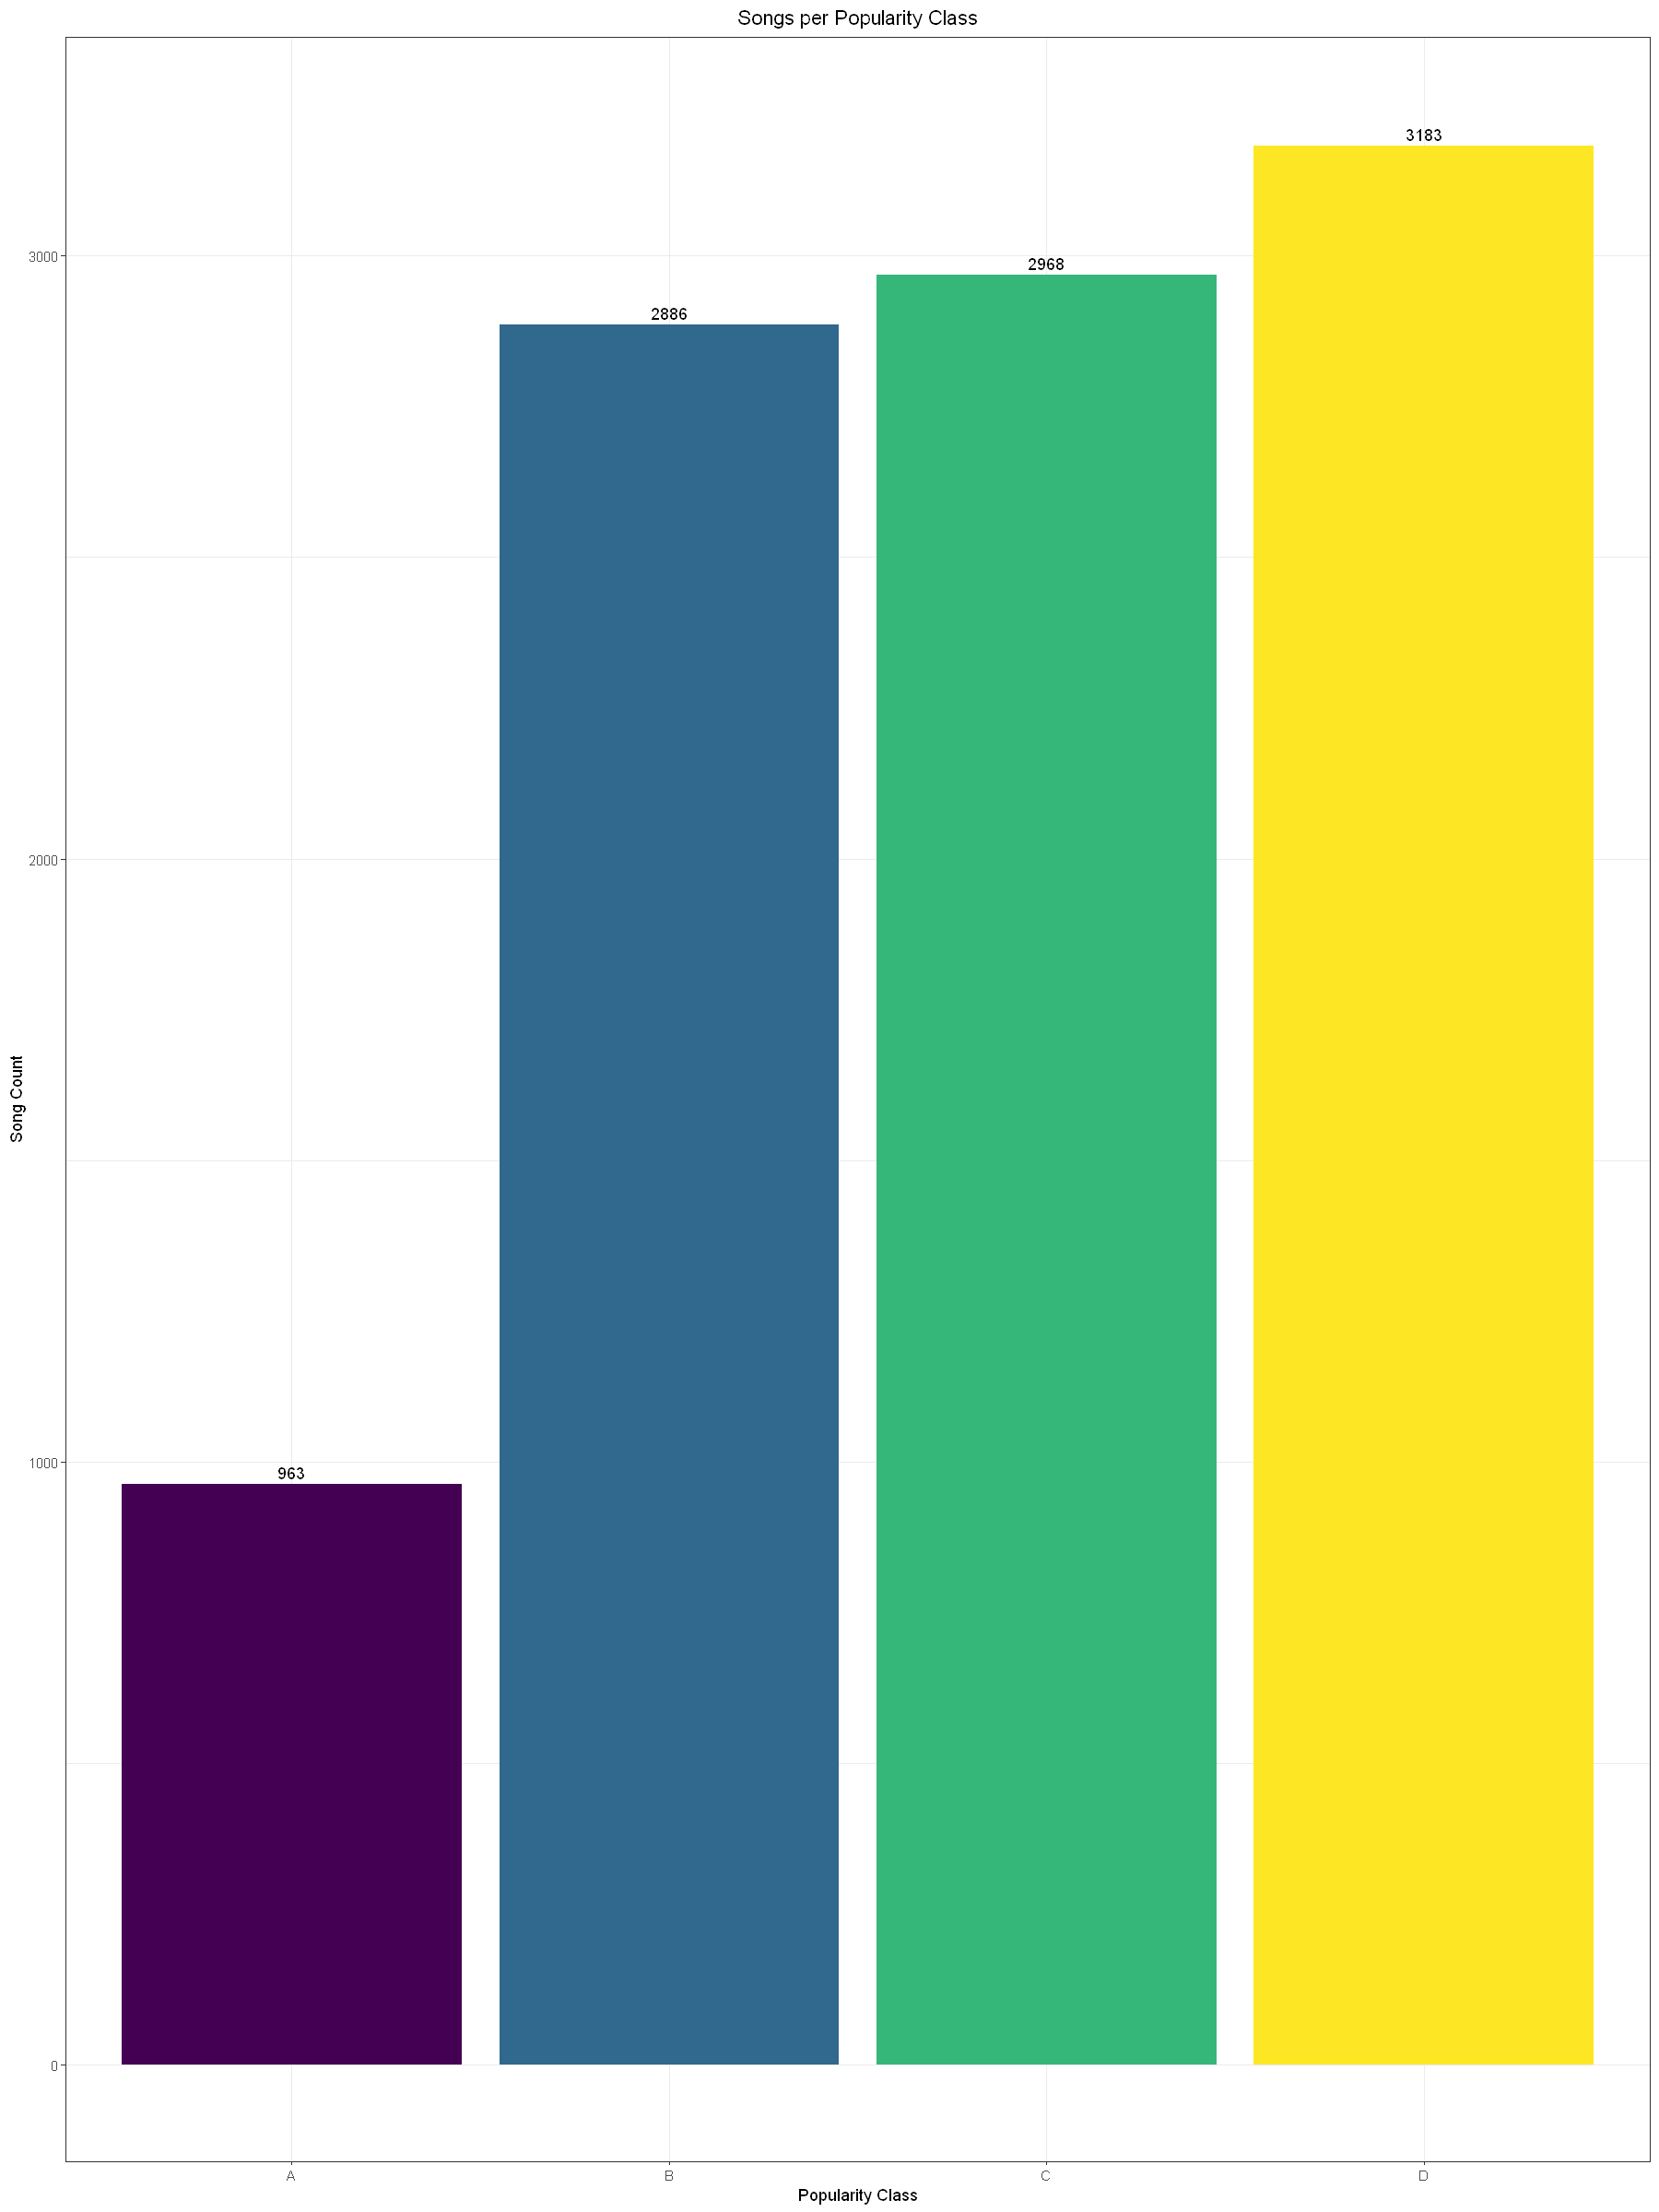

In [19]:
library(ggplot2)

p <- ggplot(pop_vec, aes(x = pop.class, y = n, fill = pop.class, label = n)) + geom_col() + 
    geom_text(nudge_y = 20) + ggtitle("Songs per Popularity Class") + xlab("Popularity Class") + 
    ylab("Song Count") + theme_bw() + theme(legend.position = "none") + theme(plot.title = element_text(hjust = 0.5))
p

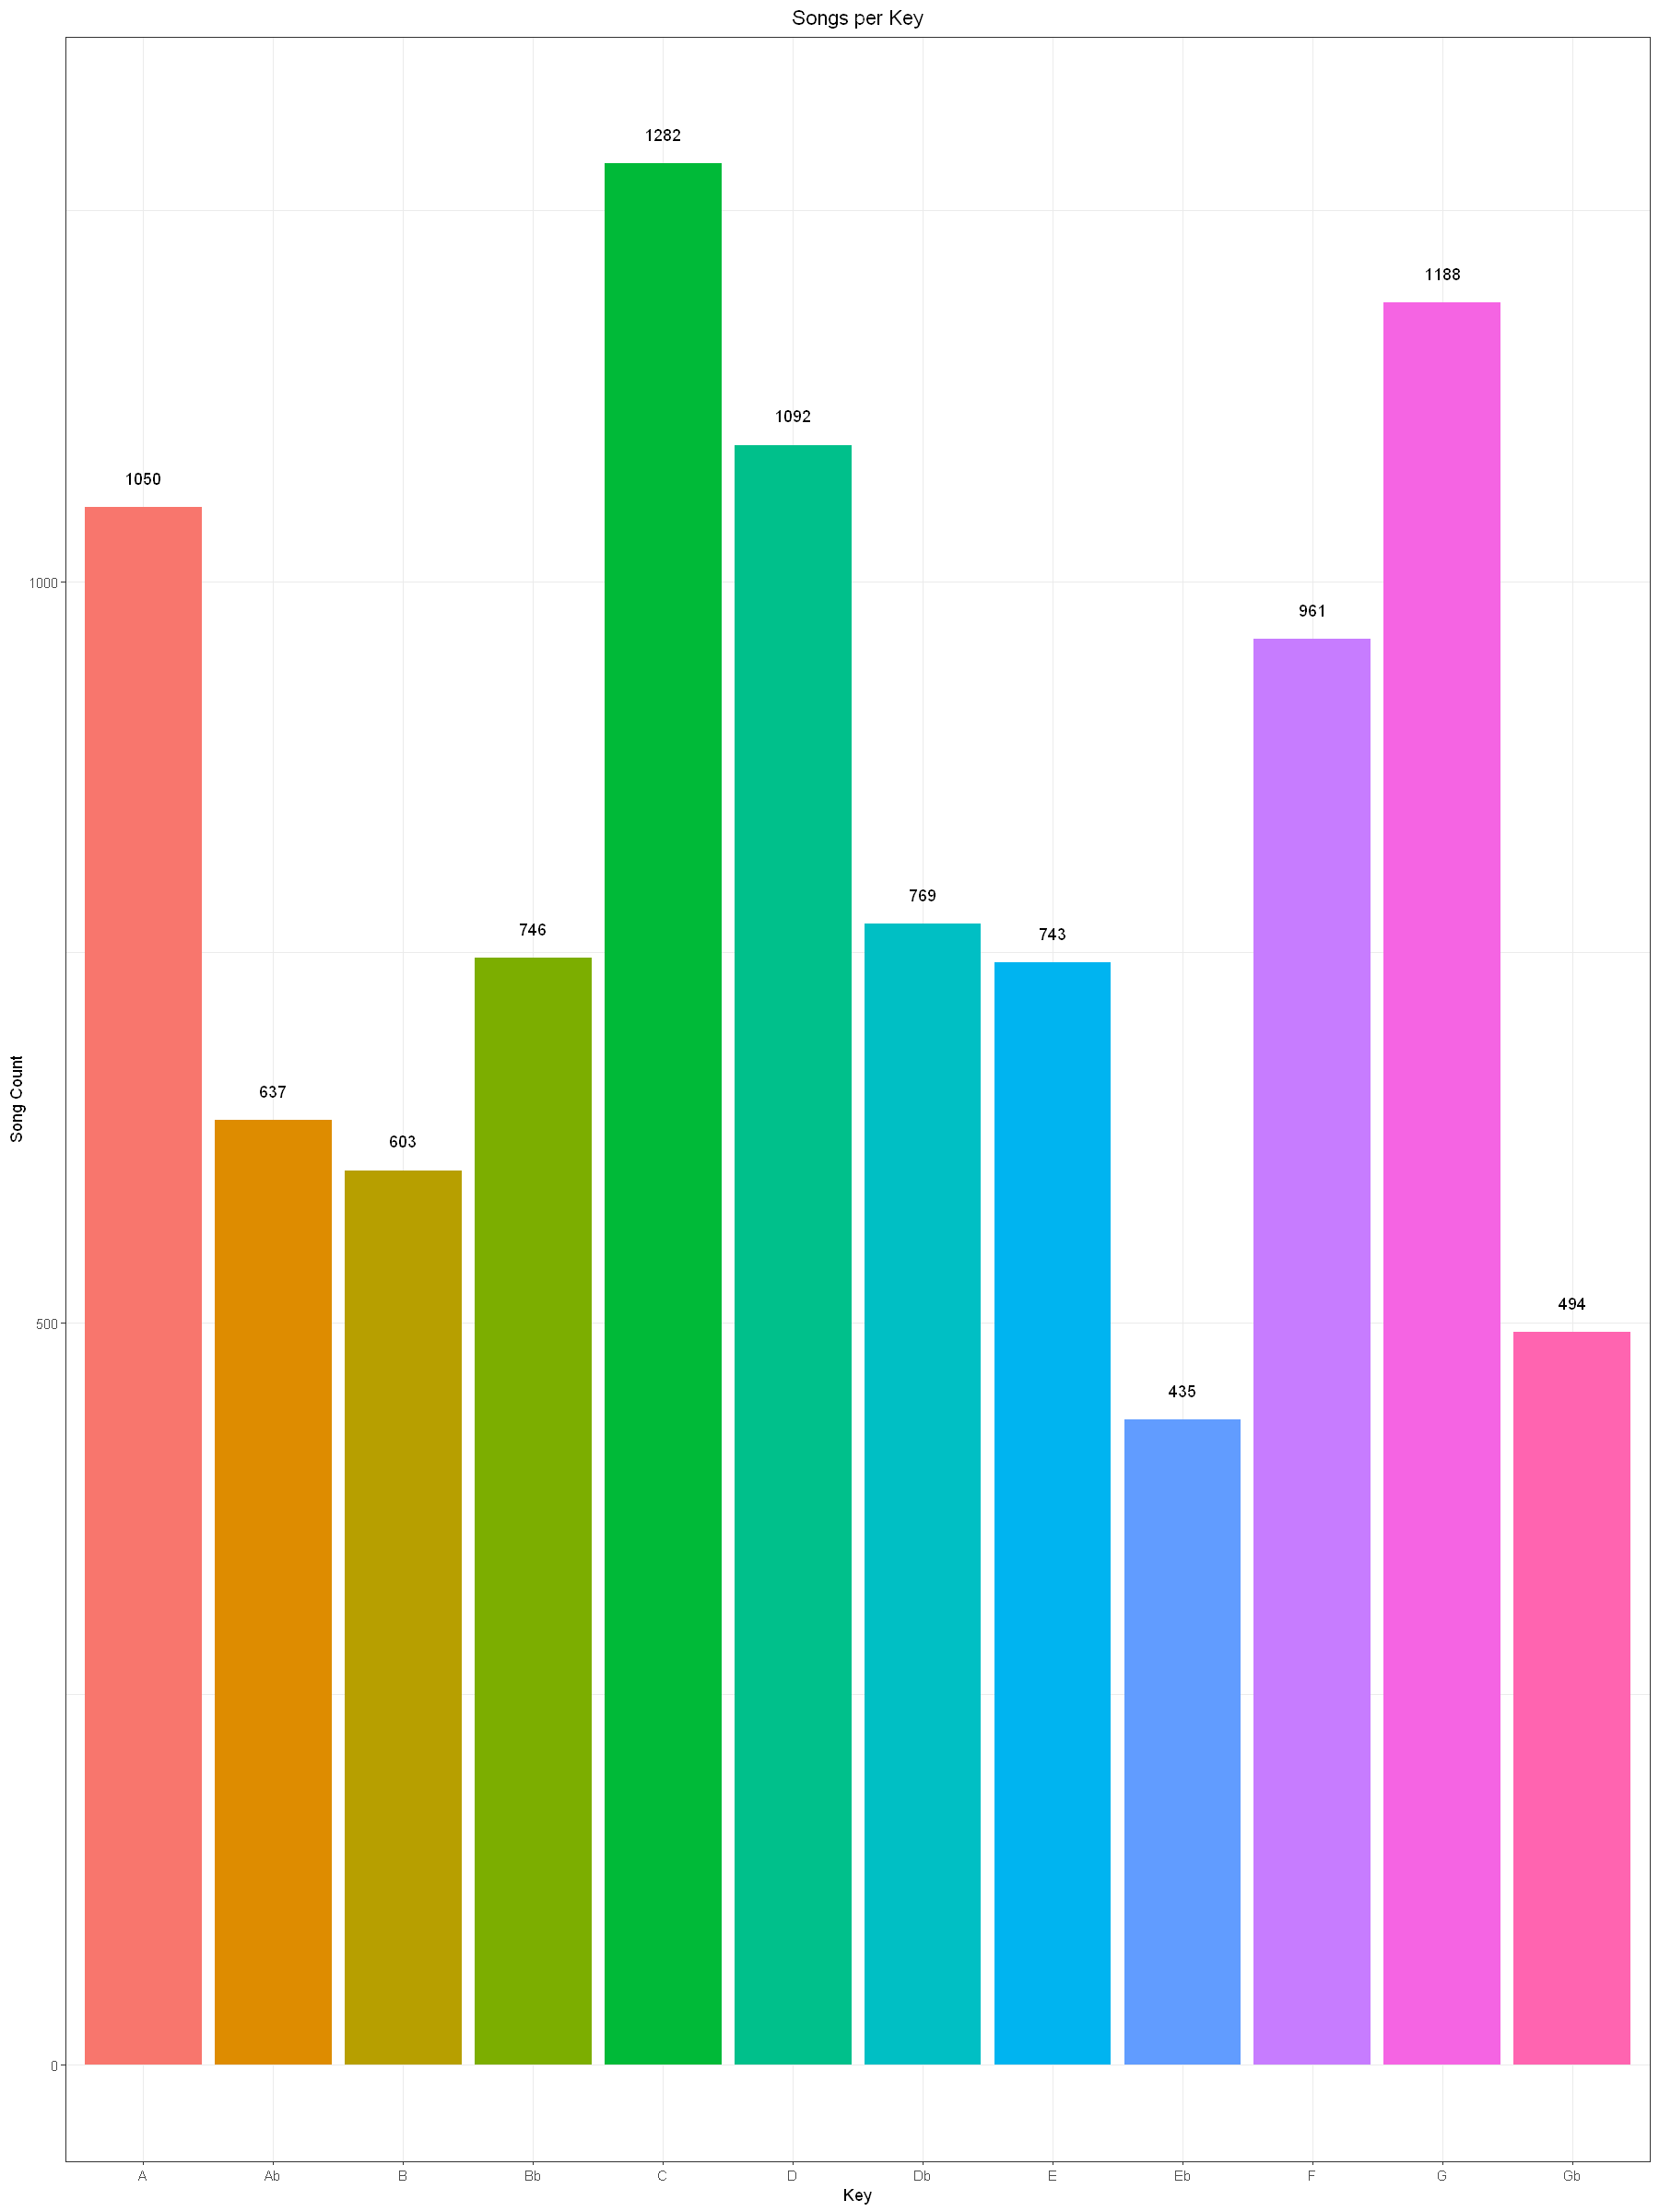

In [20]:
key_vec <- data.frame(key)
key_vec <- dplyr::count(key_vec, key)

p <- ggplot(key_vec, aes(x = key, y = n, fill = key, label = n)) + geom_col() + geom_text(nudge_y = 20) + 
    ggtitle("Songs per Key") + xlab("Key") + ylab("Song Count") + theme_bw() + theme(legend.position = "none") + 
    theme(plot.title = element_text(hjust = 0.5))
p

Warning message:
"package 'WVPlots' was built under R version 4.0.5"
Loading required package: wrapr

Warning message:
"package 'wrapr' was built under R version 4.0.5"
Warning message:
"Removed 17 rows containing missing values (geom_smooth)."


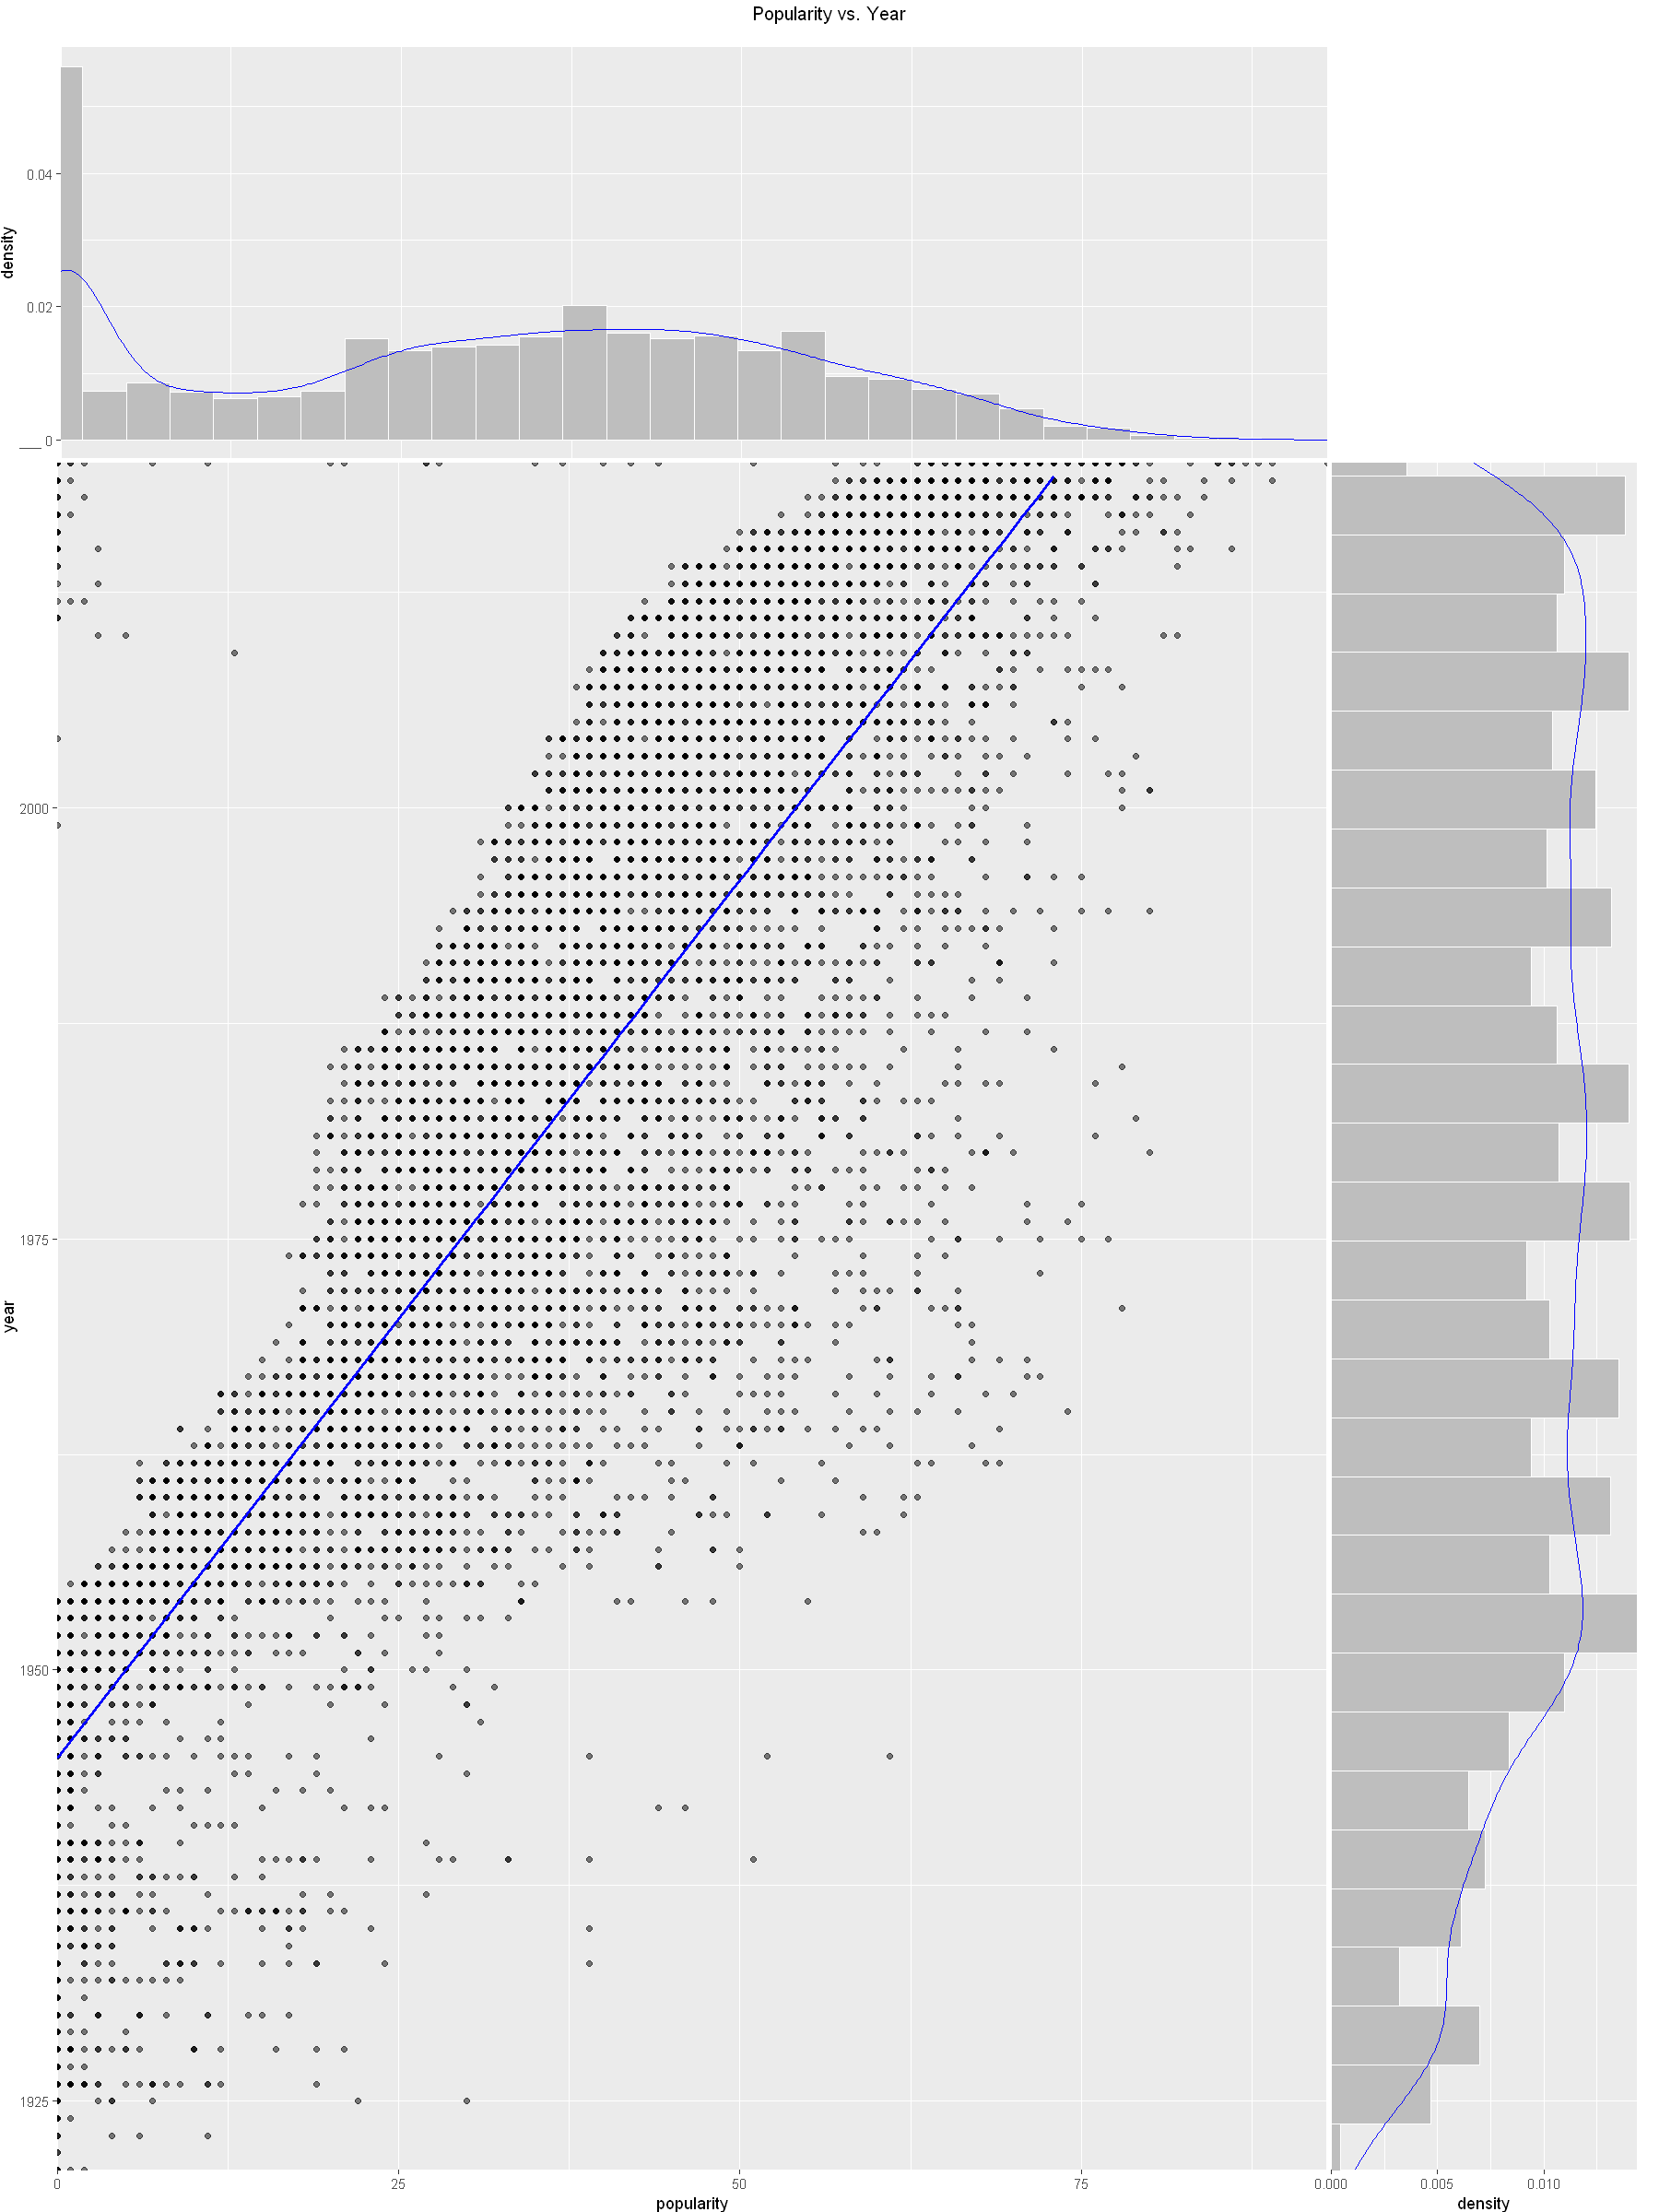

In [21]:
library(WVPlots)

ScatterHist(spotify_data, "popularity", "year", title = "Popularity vs. Year")

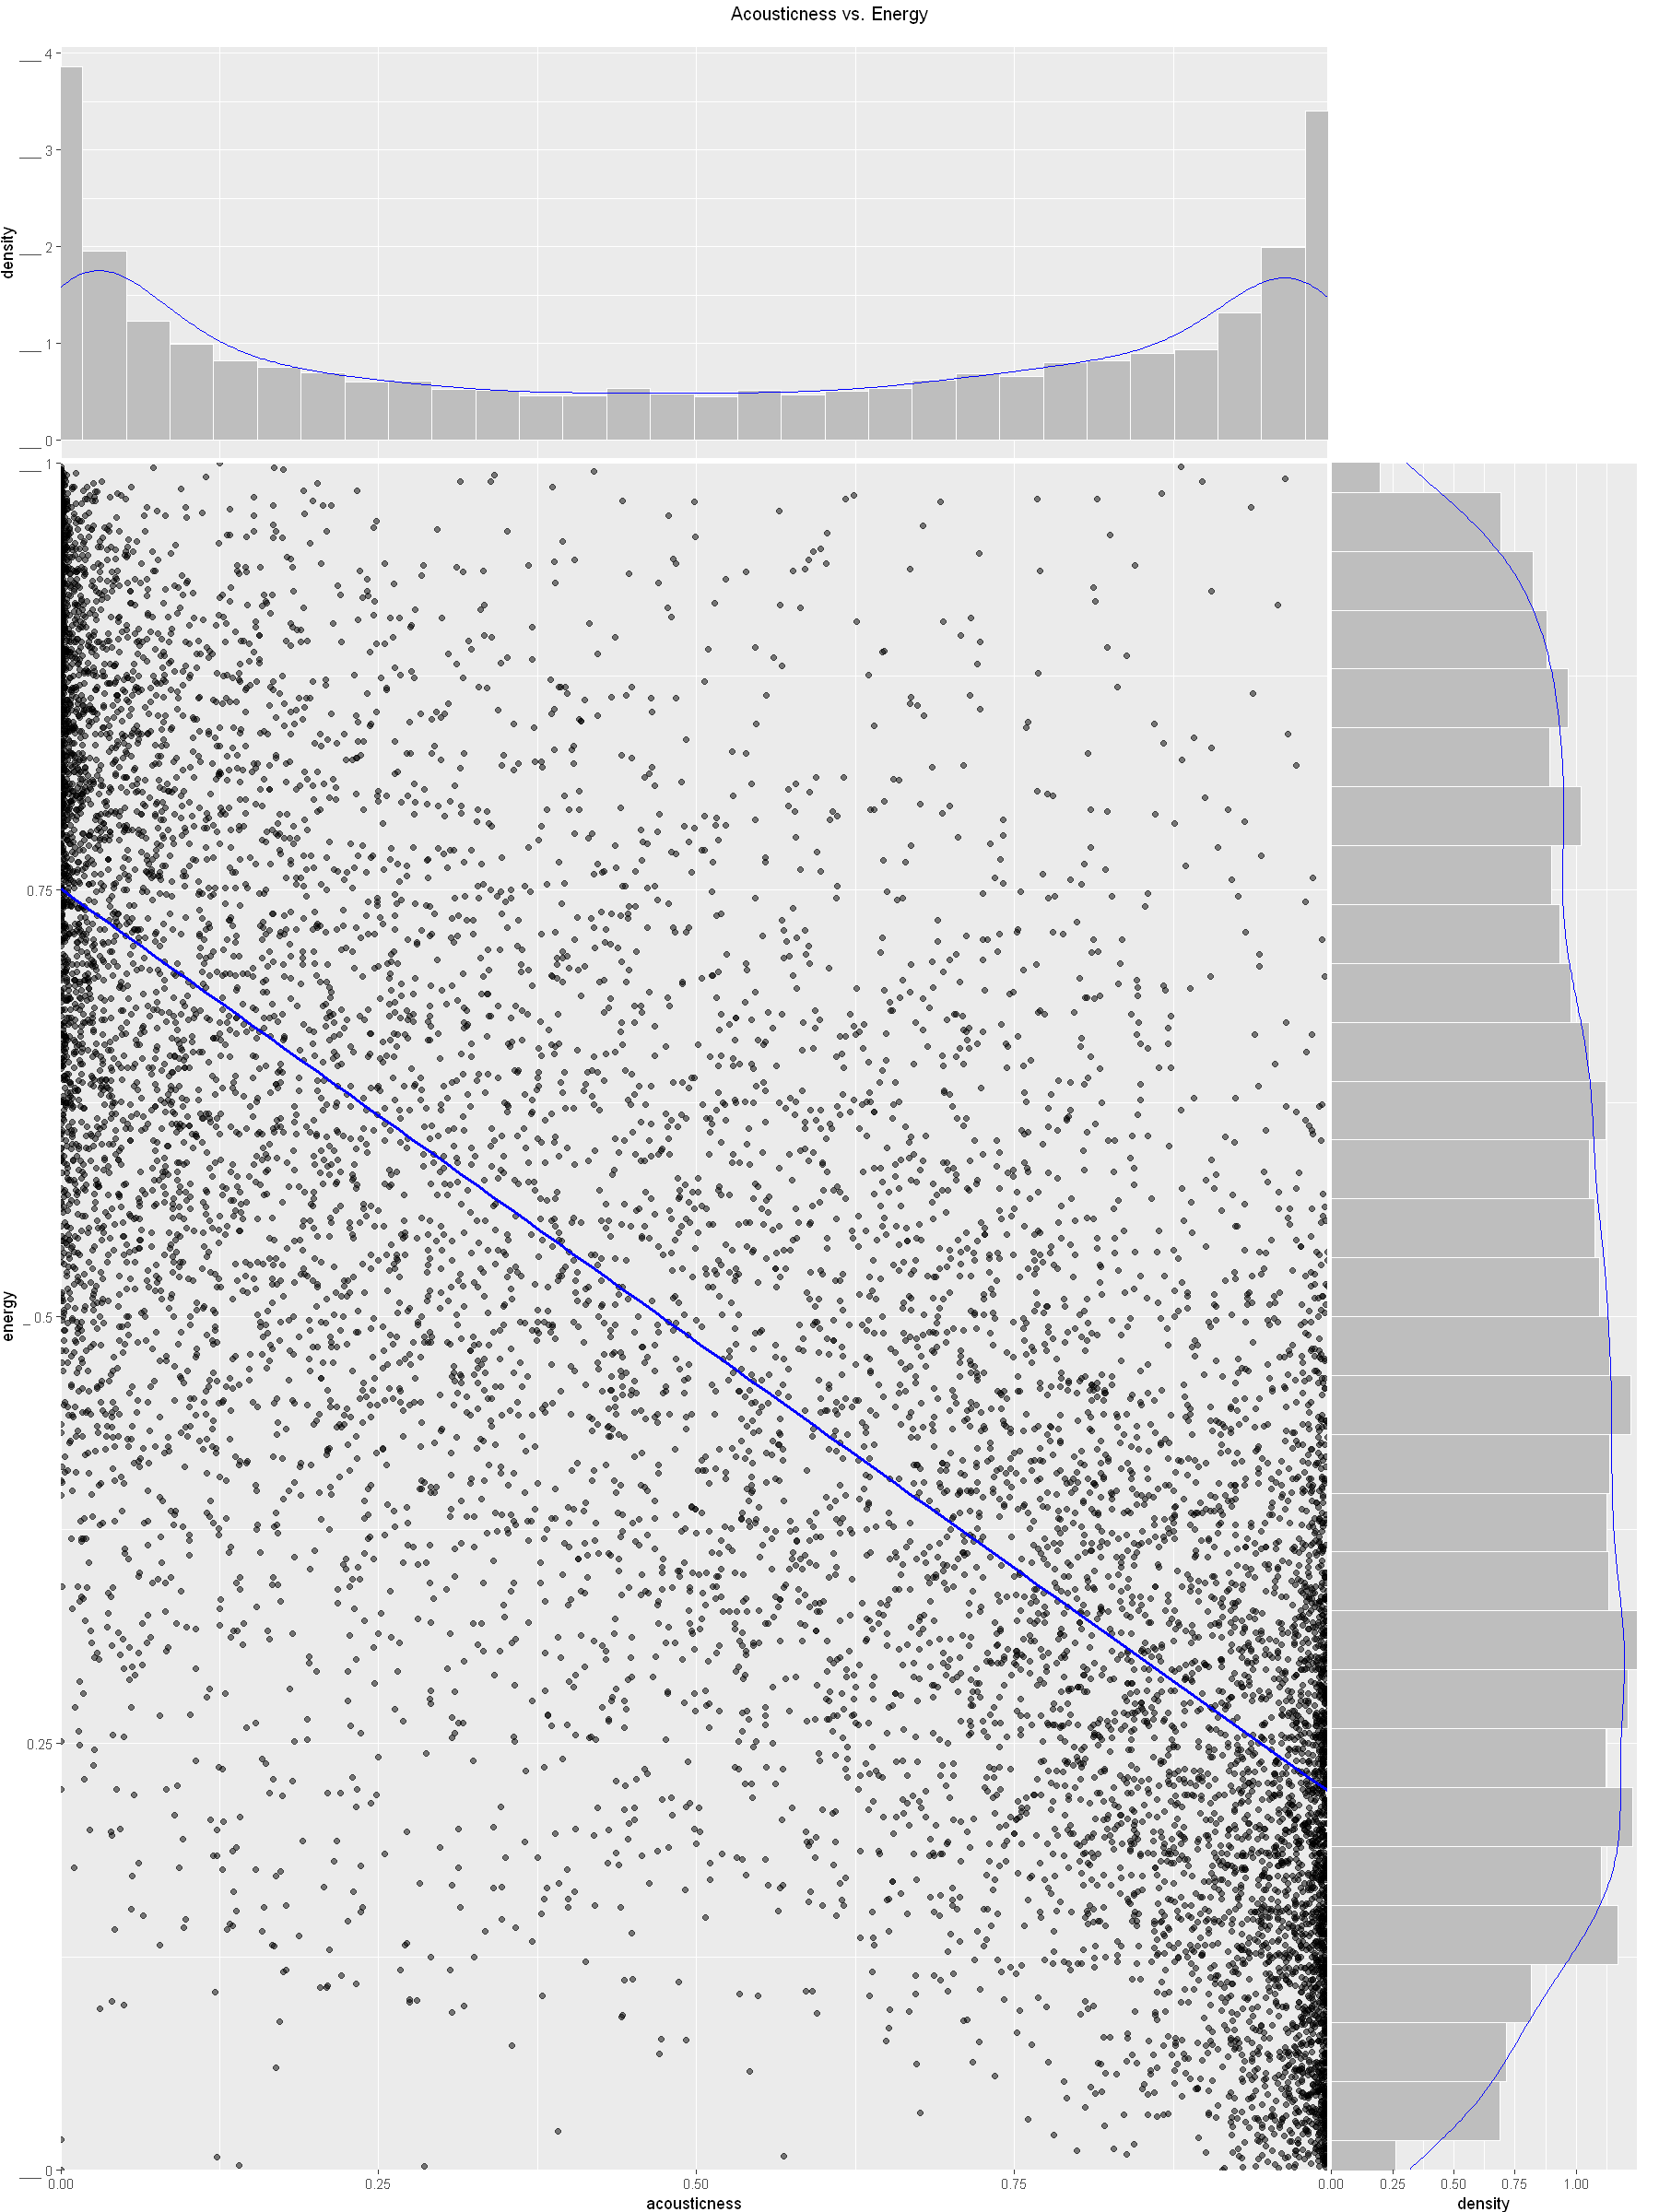

In [22]:
ScatterHist(spotify_data, "acousticness", "energy", title = "Acousticness vs. Energy")

corrplot 0.84 loaded



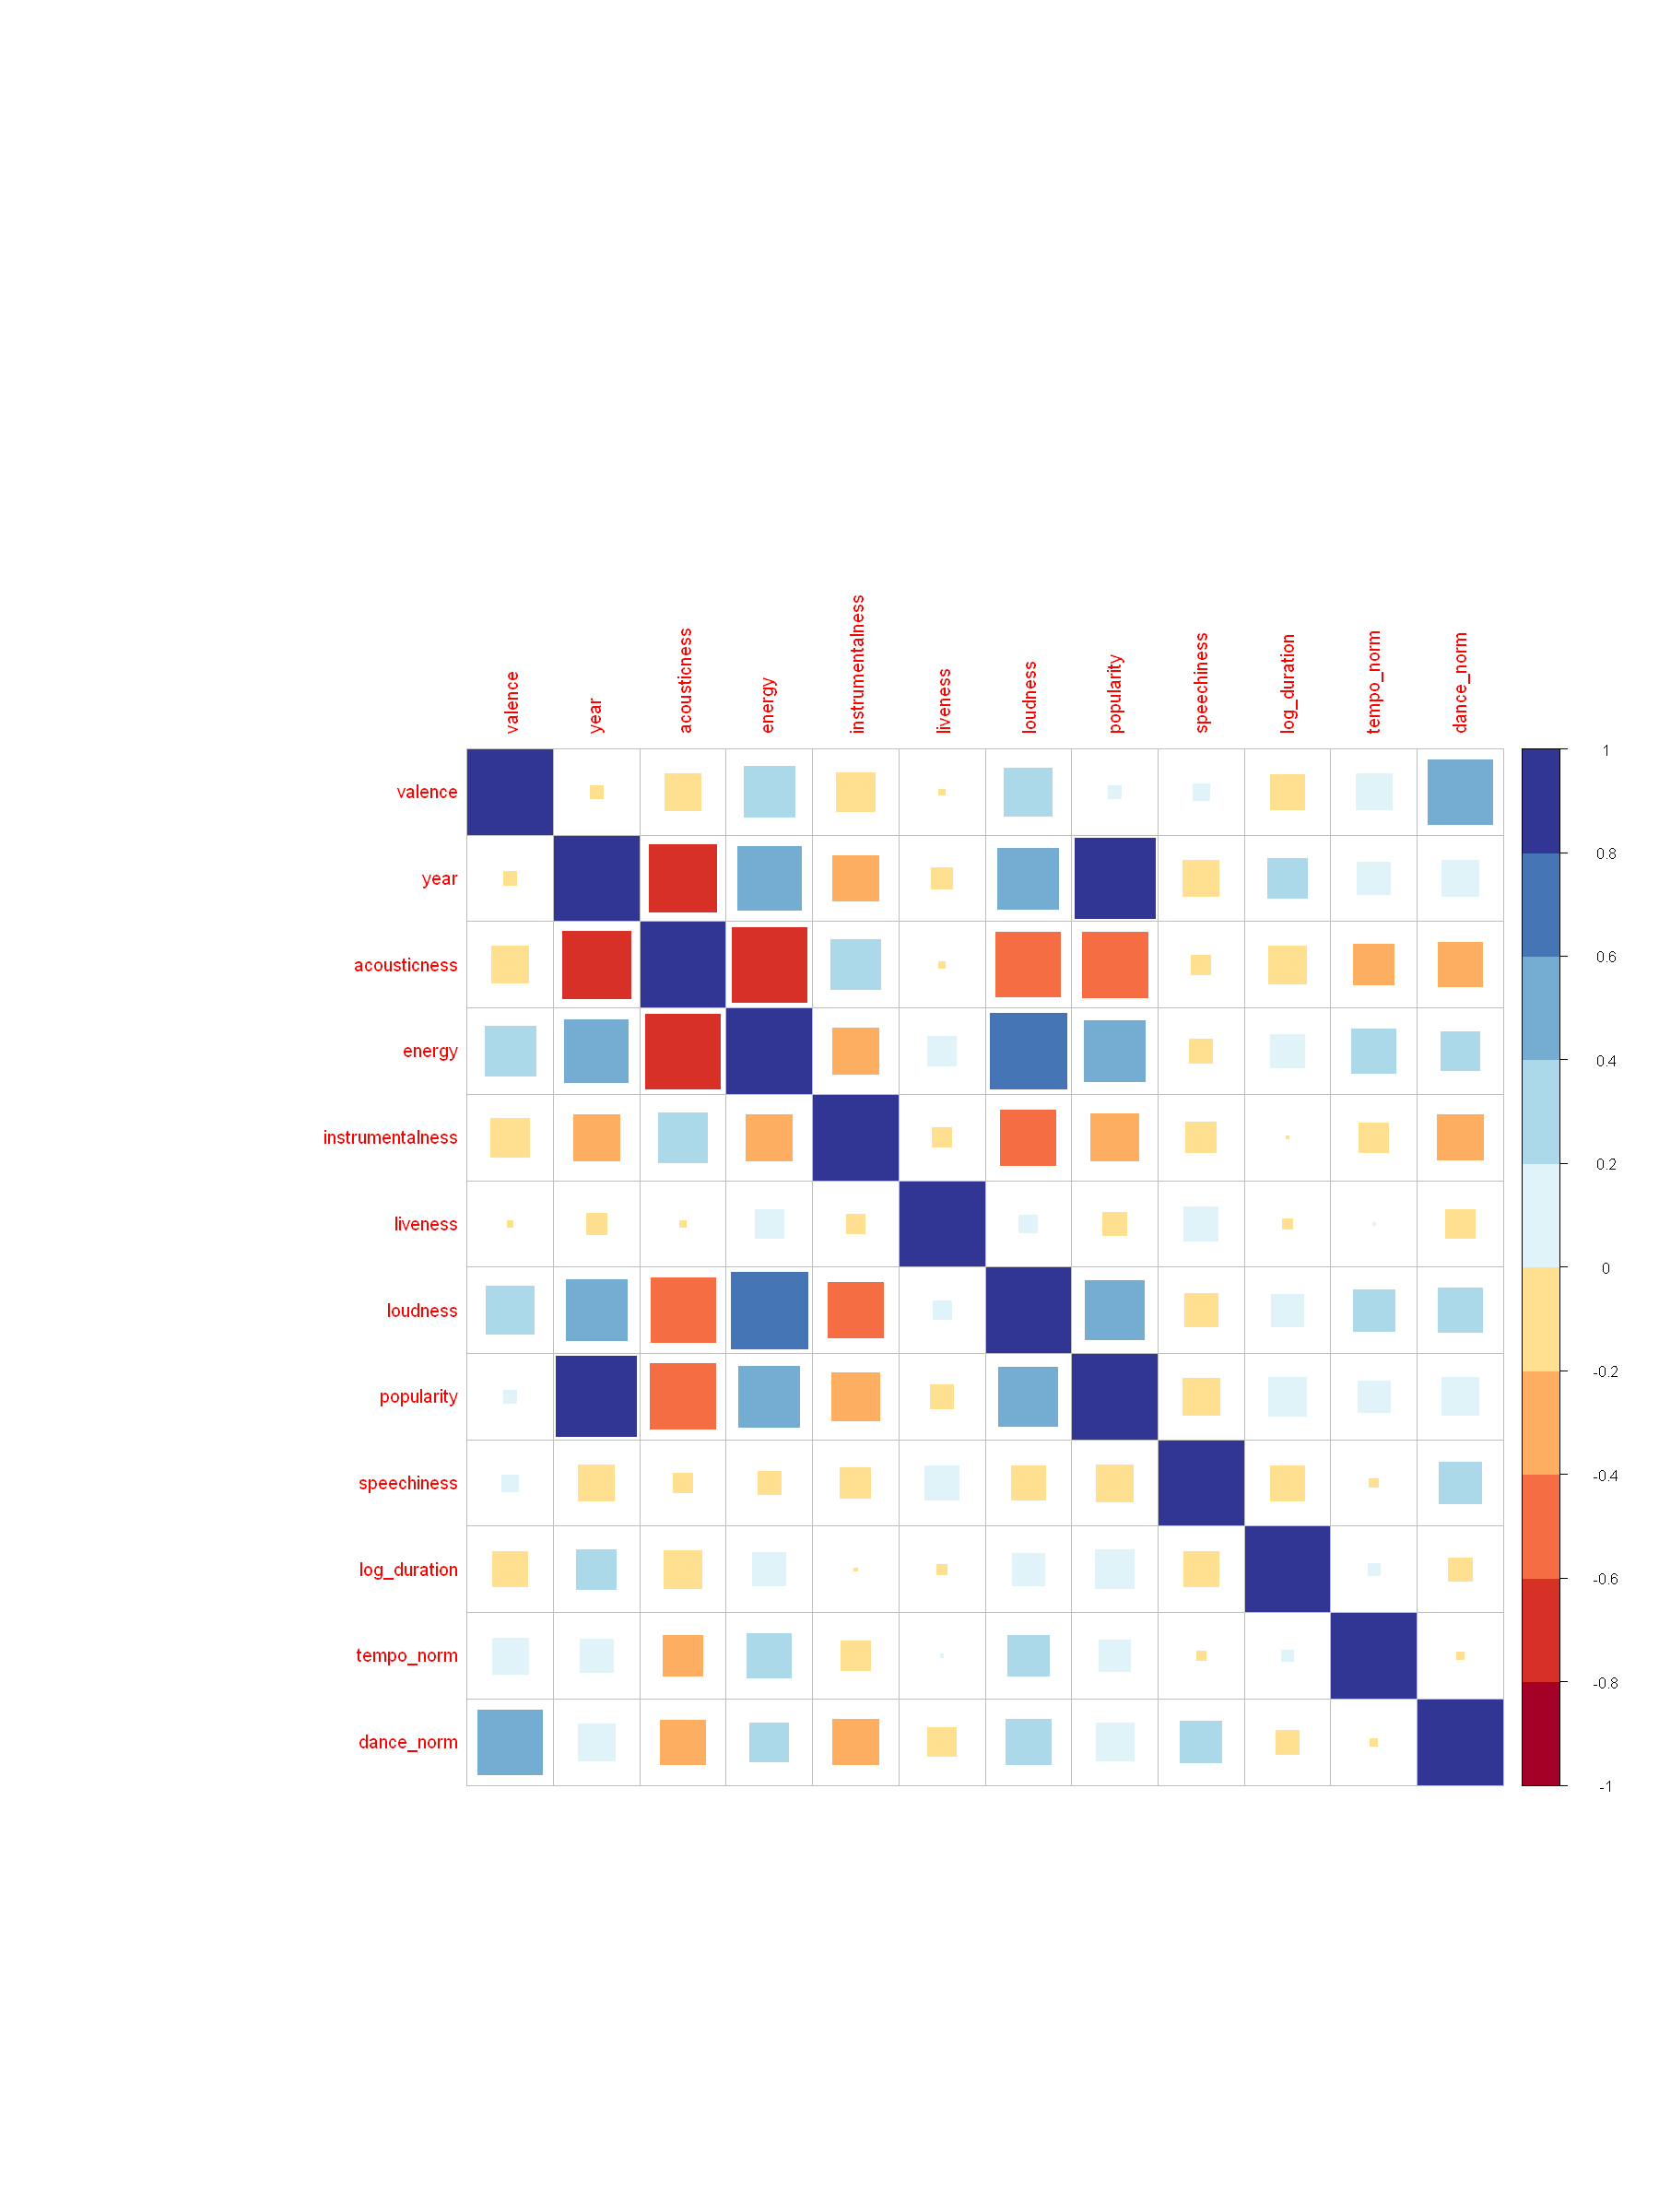

In [23]:
library(RColorBrewer)
library(corrplot)

data_quant <- spotify_data[, -c(6, 9, 12)]
M <- cor(data_quant)
corrplot(M, method = "square", col = brewer.pal(n = 10, name = "RdYlBu"))

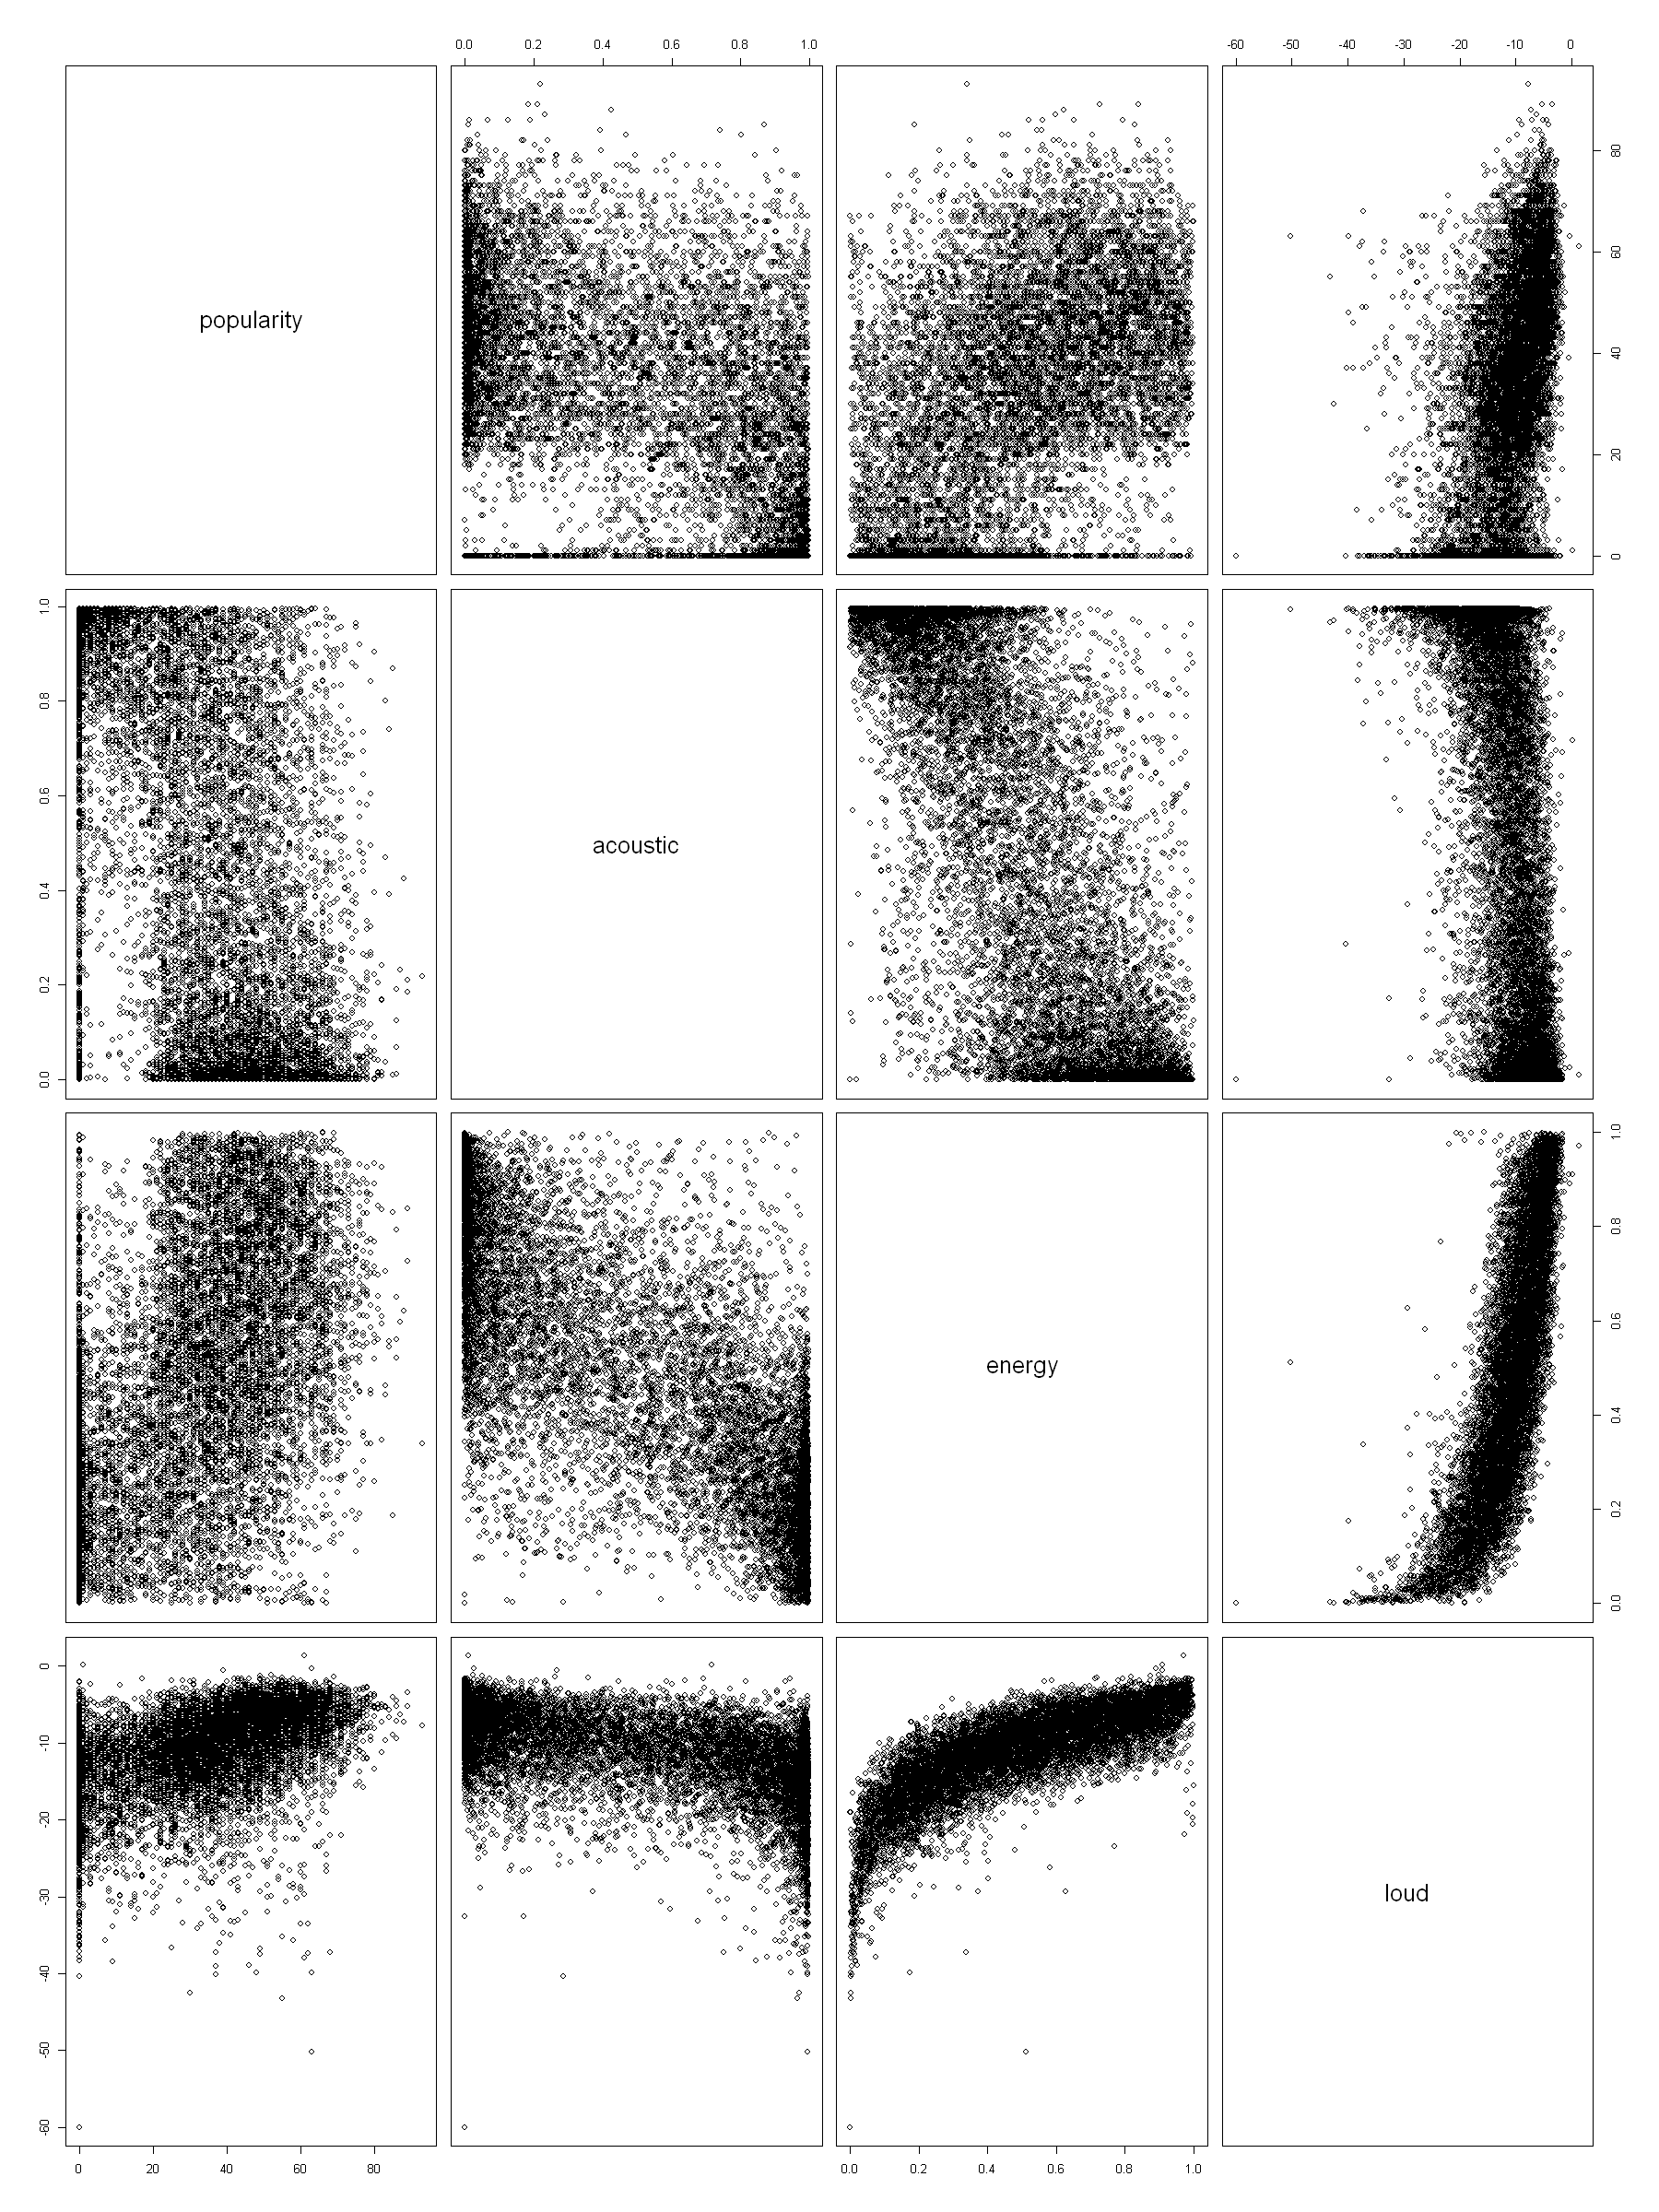

In [24]:
attributes = c("acousticness", "energy", "loudness", "popularity")

acoustic <- spotify_data$acousticness
energy <- spotify_data$energy
loud <- spotify_data$loudness

pairs(~popularity + acoustic + energy + loud, data = spotify_data)

In [ ]:
pairs(~., data = data_quant, col = "lightskyblue")

# ACP

In [ ]:
library(FactoMineR)

data_quant <- data_quant[, -c(2)]
data.pca <- PCA(data_quant, scale.unit = T, graph = F, ncp = 6)

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfrow = c(1, 2))
barplot(data.pca$eig[, 2], ylab = "Percentage", main = "Proportion of Inertia")
boxplot(data.pca$ind$coord, main = "Coordinates of Individuals")

In [ ]:
library(factoextra)

eig.val <- get_eig(data.pca)
eig.val

In [ ]:
plot(data.pca, choix = "varcor")
plot(data.pca, choix = "ind")

In [ ]:
plot(data.pca, choix = "varcor", axes = c(1, 3))

In [ ]:
# Scree plot - Eigenvalues
fviz_eig(data.pca, addlabels = TRUE)

In [ ]:
barplot(eig.val[, 3], col = rgb(70/255, 130/255, 180/255))
abline(h = 80, col = "red", lty = 2)

In [ ]:
var <- get_pca_var(data.pca)
var

In [ ]:
fviz_pca_var(data.pca, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", 
    "#FC4E07"), repel = TRUE)

In [ ]:
corrplot(var$cos2, is.corr = FALSE)
fviz_cos2(data.pca, choice = "var", axes = 1:2)

# Préparation des données

In [ ]:
spotify_pop_class = spotify_data$pop.class
spotify_key = spotify_data$key

In [ ]:
spotify_pop_class_encoded = as.numeric(factor(spotify_pop_class))-1
spotify_pop_class_encoded[0:10]

In [ ]:
spotify_key_encoded = as.numeric(factor(spotify_key))-1
spotify_key_encoded[0:10]

In [ ]:
spotify_data$key = spotify_key_encoded
spotify_data$pop.class = spotify_pop_class_encoded

In [ ]:
X = subset(spotify_data, select = -c(popularity, pop.class))
y_class = spotify_data$pop.class
y_reg = spotify_data$popularity

In [ ]:
head(X)

In [ ]:
print(y_reg[0:5])
print(y_class[0:15])

# Apprentissage

In [ ]:
set.seed(42)
test.ratio <- 0.2
npop <- nrow(spotify_data)
nvar <- ncol(spotify_data)
ntest <- ceiling(npop * test.ratio)
testi <- sample(1:npop, ntest)
appri <- setdiff(1:npop, testi)

In [ ]:
# construction de l'échantillon d'apprentissage
datappr <- spotify_data[appri, -12]
# construction de l'échantillon test
datestr <- spotify_data[testi, -12]
# vérification
str(datappr)
str(datestr)
# summary(datappr)

In [ ]:
plot.res <- function(x, y, titre = "titre") {
    plot(x, y, col = "blue", xlim = c(0, 250), ylim = c(-100, 100), ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

In [ ]:
reg.lm <- aov(popularity ~ ., data = datappr)

# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Graphe des résidus.
plot.res(fit.lm, res.lm, "Régression linéaire sans sélection de variables")

In [ ]:
summary(reg.lm)

In [ ]:
str(datappr)

In [ ]:
library(glmnet)

# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 10],
                           x = as.matrix(datappr[, -c(6, 9)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(popularity ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$popularity, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

In [ ]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 10], x = x.mat)
plot(reg.lasso.cv)

In [ ]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

In [ ]:
# Extraction des valeurs ajustées et des résidus
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$popularity - fit.lasso
# Graphe des résidus
options(repr.plot.width = 16, repr.plot.height = 9)
par(mfrow = c(1, 2))
plot.res(fit.lm, res.lm, "linéaire")
plot.res(fit.lasso, res.lasso, "linéaire, pénalité L1")